<img src='./images/sm05.png' width='70px'>

# SM 엔터테인먼트 수익률

- 2024년 6월 17일 기준으로 작성

#### ○ SM엔터테인먼트
- 코스닥(KOSDAQ) 시장에서 거래된다.
- SM엔터테인먼트는 대한민국의 대표적인 엔터테인먼트 기업으로, 가수, 배우 등의 매니지먼트와 음악, 드라마, 영화 등의 콘텐츠 제작을 주로 한다.
- 이 회사는 다양한 아티스트의 매니지먼트 및 트레이닝을 통해 대중문화 산업을 선도하며, 글로벌 시장에서도 활발히 활동하고 있다.
- SM엔터테인먼트는 NCT, Red Velvet, aespa 등 다수의 인기 아이돌 그룹을 보유하고 있으며, 다양한 엔터테인먼트 사업을 통해 수익을 창출한다.  
<sub>*코스닥(KOSDAQ): 대한민국의 중소기업과 벤처기업을 위한 주식 시장</sub>

<br>

#### ○ GLD(금 펀드)
- 뉴욕 증권거래소 아카(Euronext Arca)에서 거래된다.
- 상장수지펀드(ETF)로 금의 가격 움직임을 추적하도록 설계되어있다.
- 이 펀드는 투자자들이 실제로 물리적인 금을 소유하지 않고도 금의 가격에 투자할 수 있는 방법을 제공한다.  
<sub>*상장지수펀드(ETF, Exchange-Traded Fund): 주식 시장에서 거래되는 투자 펀드</sub>

<img src='./images/sm01.png' width='800px'>
<div>
    <img src='./images/sm04.png' width='500px'>
    <img src='./images/sm02.png' width='500px'>
</div>

- 그룹 소녀시대의 상승세에 따라 2010년을 기점으로 큰 변동이 발생하기 때문에, 2010년을 기준으로 데이터를 추출하기로 한다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### Ⅰ. 데이터 분석

In [2]:
import yfinance as yf

# SM 엔터테인먼트와 GLD(금 펀드, ETF) 티커를 저장
columns = ['041510.KQ', 'GLD']  

# yfinance 라이브러리를 사용하여 특정 종목 데이터를 다운로드 후 시계열 데이터 프레임으로 변환 (소수점 4자리까지 표기)
f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,041510.KQ,GLD
Date,,
2010-01-04,4196.3833,109.800
2010-01-05,4408.4121,109.700
2010-01-06,4240.5562,111.510
2010-01-07,4236.1387,110.820
2010-01-08,4055.0315,111.370
...,...,...
2024-06-11,83200.0000,214.150
2024-06-12,81400.0000,214.720
2024-06-13,82000.0000,212.970


In [3]:
# sm엔터테이먼트 컬럼을 명확하게 확인할 수 있도록 컬럼명 변경
pre_f_df = f_df.rename(columns={'041510.KQ': 'SM'})
pre_f_df

Ticker,SM,GLD
Date,,
2010-01-04,4196.3833,109.800
2010-01-05,4408.4121,109.700
2010-01-06,4240.5562,111.510
2010-01-07,4236.1387,110.820
2010-01-08,4055.0315,111.370
...,...,...
2024-06-11,83200.0000,214.150
2024-06-12,81400.0000,214.720
2024-06-13,82000.0000,212.970


<img src='./images/krw01.png' width='600px'>
<sub>*2024년 6월 17일 오전 10시 경 기준</sub>

In [4]:
# 달러 금액을 원화로 변경하는 함수 선언
def krw_transform(usd):
    usd = usd * 1380
    return usd

In [5]:
# 함수를 사용하여 원화로 변경
pre_f_df.GLD = pre_f_df.GLD.apply(lambda x: krw_transform(x))
pre_f_df

Ticker,SM,GLD
Date,,
2010-01-04,4196.3833,151524.00
2010-01-05,4408.4121,151386.00
2010-01-06,4240.5562,153883.80
2010-01-07,4236.1387,152931.60
2010-01-08,4055.0315,153690.60
...,...,...
2024-06-11,83200.0000,295527.00
2024-06-12,81400.0000,296313.60
2024-06-13,82000.0000,293898.60


In [6]:
# 데이터 정보 출력
pre_f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3749 entries, 2010-01-04 to 2024-06-17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SM      3555 non-null   float64
 1   GLD     3638 non-null   float64
dtypes: float64(2)
memory usage: 87.9 KB


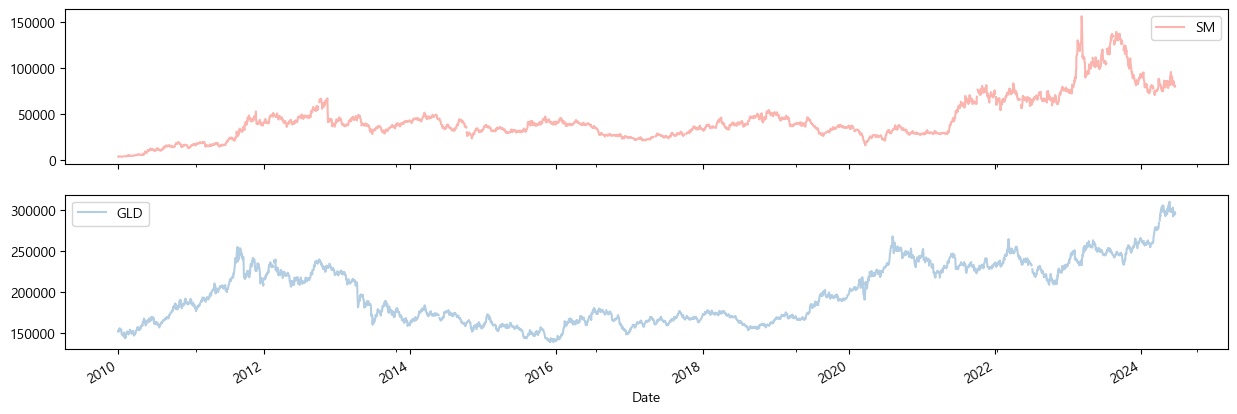

In [7]:
import matplotlib.pyplot as plt

# 데이터 시각화
# figsize: 데이터 크기 지정
# subplots: 여러 개의 하위 그래프(서브 플롯) 생성, 각 변수의 데이터를 개별적으로 시각화
pre_f_df.plot(figsize=(15, 5), color=colors, subplots=True)

plt.show()

- 2010년 ~ 현재시점까지의 데이터를 보았을 때 SM과 GLD은 2011년을 기점으로 금액이 상승하였다가 2013년 쯤 하락하였으며,  
  2020년 ~ 2021년을 기점으로 다시 금액이 상승하는 것을 볼 수 있다.
- 주가 변동 패턴이 어느정도 유사하게 나타남에 따라 두 종목 간의 상관관계를 추정해볼 수 있다.

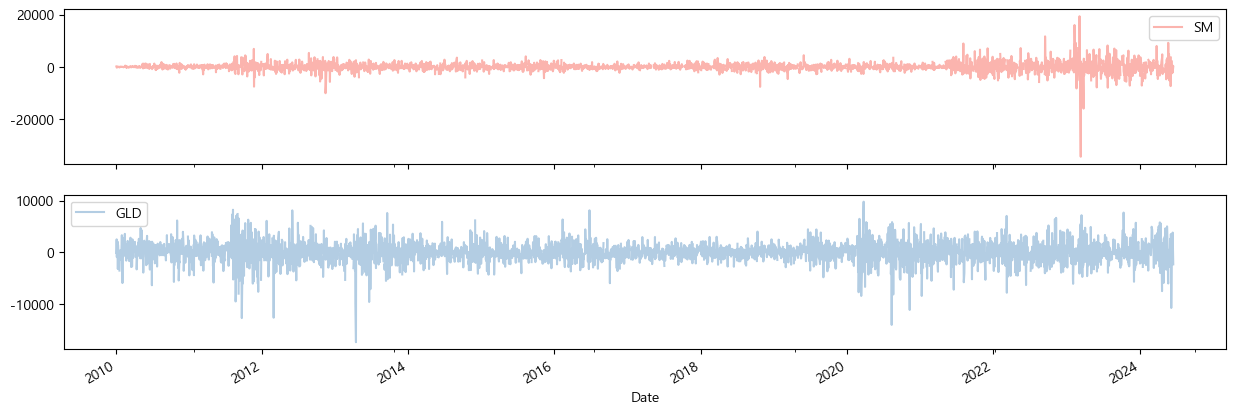

In [8]:
# 차분 후 데이터 시각화
pre_f_df.diff().plot(figsize=(15, 5), color=colors, subplots=True)
plt.show()

- 차분 후 데이터를 확인하였을 때, SM, GLD 수익률의 변동이 전반적으로 크지 않기 때문에 일반적으로 안정적이라 판단되나  
  2023년 sm의 수익률이 크게 변동한 것으로 나타나 해당 연도에 안정성이 떨어진 것으로 보여진다.

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4764\1268347061.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pre_f_df.pct_change().mean().plot(kind='bar', color=colors, edgecolor='black', ax=ax[0])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_4764\1268347061.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pre_f_df.pct_change().std().plot(kind='bar', color=colors, edgecolor='black', ax=ax[1])


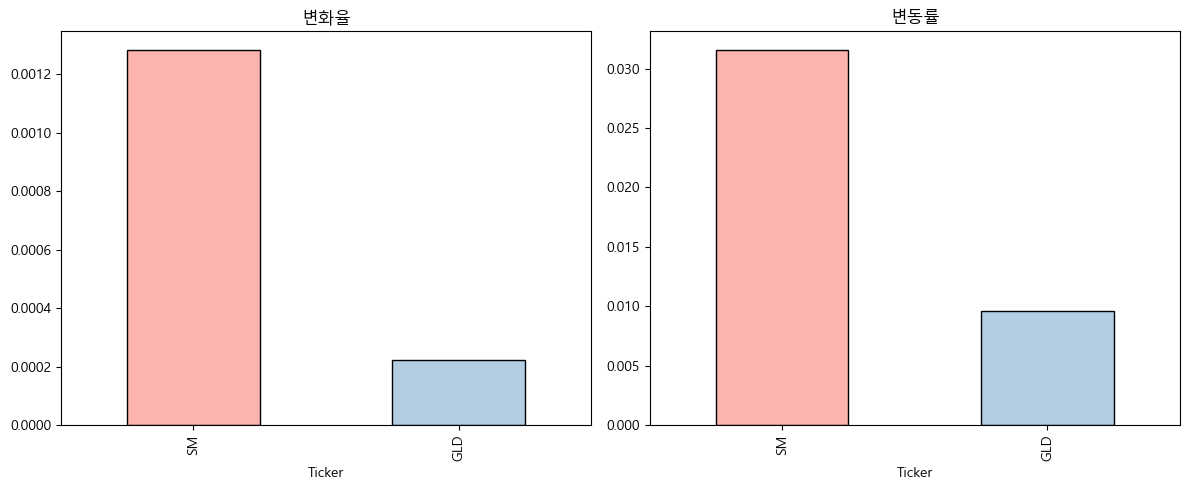

In [9]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 변화율 시각화
pre_f_df.pct_change().mean().plot(kind='bar', color=colors, edgecolor='black', ax=ax[0])
ax[0].set_title('변화율')

# 변동률 시각화
pre_f_df.pct_change().std().plot(kind='bar', color=colors, edgecolor='black', ax=ax[1])
ax[1].set_title('변동률')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

- SM과 GLD의 변화율 및 변동률을 비교한 결과, SM의 변화율과 변동률이 상대적으로 높게 나타났다.
- 2023년 SM의 수익률 변동이 크게 발생한 점을 고려할 때, 단기적인 변동이 장기적인 안정성을 올바르게 반영하지 못할 가능성이 있다.

In [10]:
import numpy as np

# 수익률 계산
# 각 날짜의 주가를 전날 주가로 나눈 후 로그를 취해 수익률 계산
# 로그를 취해 백분율로 변환
rate_f_df = np.log(pre_f_df / pre_f_df.shift(1))
rate_f_df

Ticker,SM,GLD
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.049292,-0.000911
2010-01-06,-0.038820,0.016365
2010-01-07,-0.001042,-0.006207
2010-01-08,-0.043694,0.004951
...,...,...
2024-06-11,-0.028438,0.002853
2024-06-12,-0.021872,0.002658
2024-06-13,0.007344,-0.008184


In [11]:
# 변동률 계산하기
# 변동률 = (오늘 종가 - 어제 종가) / 어제 종가
pct_f_df = pre_f_df.pct_change()
pct_f_df

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4764\2897853295.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_f_df = pre_f_df.pct_change()


Ticker,SM,GLD
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.050527,-0.000911
2010-01-06,-0.038076,0.016500
2010-01-07,-0.001042,-0.006188
2010-01-08,-0.042753,0.004963
...,...,...
2024-06-11,-0.028037,0.002857
2024-06-12,-0.021635,0.002662
2024-06-13,0.007371,-0.008150


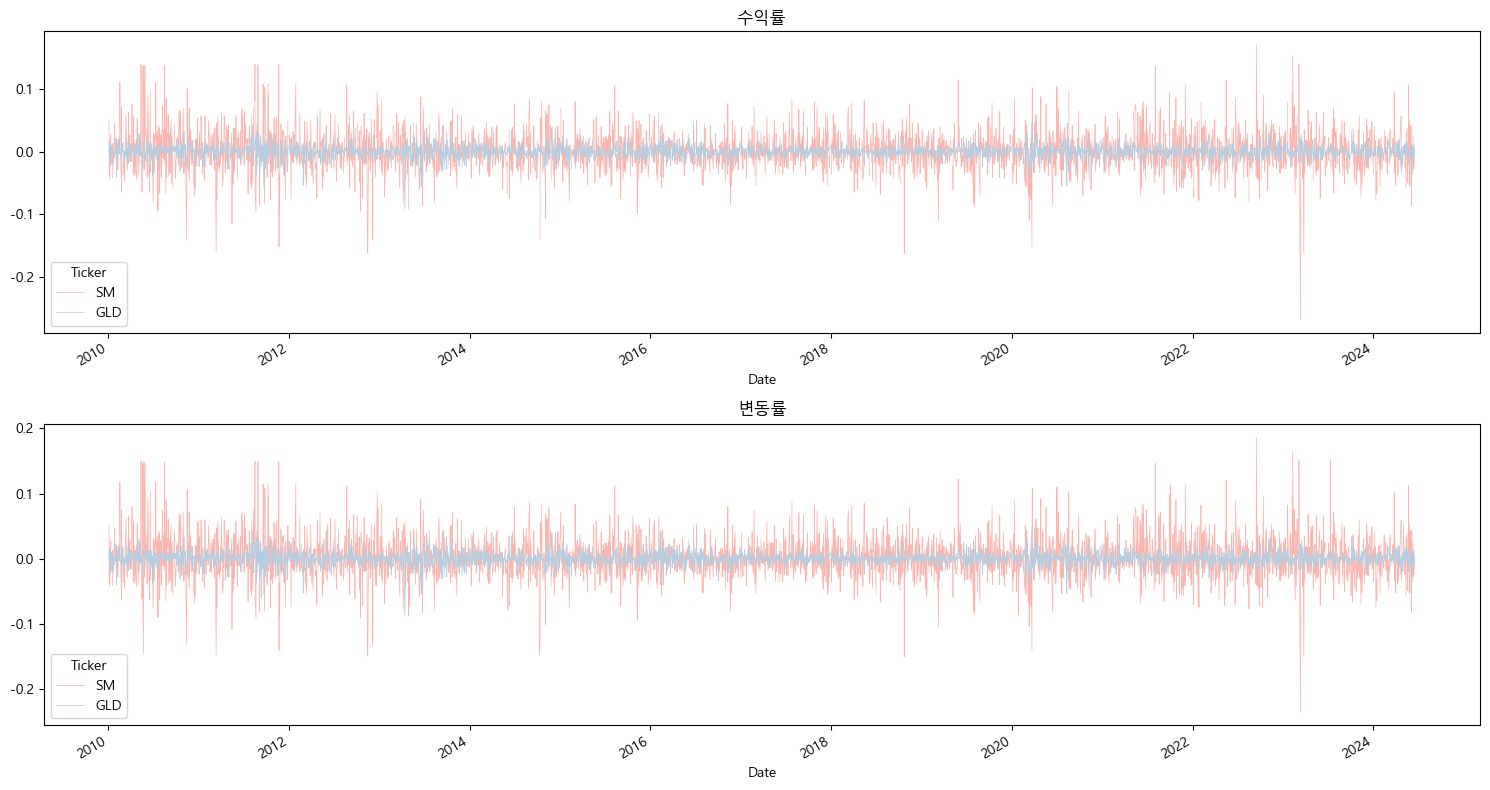

In [12]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

# 특정 데이터 수익률 시각화
# lw = line widht = 선 두께
rate_f_df[['SM', 'GLD']].plot(color=colors, lw=0.5, ax=ax[0])
ax[0].set_title('수익률')

# 특정 데이터 수익률 시각화
# lw = line widht = 선 두께
pct_f_df[['SM', 'GLD']].plot(color=colors, lw=0.5, ax=ax[1])
ax[1].set_title('변동률')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [13]:
# 연율화
# 연간 영업일(약 252일로 계산)
rate_f_df.mean() * 252

Ticker
SM     0.259264
GLD    0.047252
dtype: float64

In [14]:
# 연율화
# 2년간 영업일(약 504일로 계산)
rate_f_df.mean() * 504

Ticker
SM     0.518529
GLD    0.094503
dtype: float64

- 현재 시점에서 과거의 시점을 기준으로 SM과 GLD의 수익률을 계산하고 시각화했다.
- SM과 GLD의 연율화된 연간 수익률을 비교하였을 때, SM이 25.84%, GLD가 4.78%로 SM의 수익율이 더 높다는 것을 확인했다.
- 하지만, SM의 수익율이 높은 대신 변동률은 GLD가 더 안정적이므로  
  고수익을 원하는 투자자는 SM을 선호할 수 있지만, 안정적인 투자를 원하는 경우에는 GLD를 선택할 수 있다.

In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중 공산성 평가 지표 VIF 함수 선언
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [16]:
# NaN 값 제거 후 VIF 확인
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,1.000015,SM
1,1.000015,GLD


- SM과 GLD의 다중공선성을 확인하여 두 종목 간의 상관관계를 평가한 결과, 각 VIF 점수가 약 1로 나타나며 매우 낮은 상관관계를 보였다.  
- 따라서 주가 변동 패턴이 유사하다고 해서 두 종목 간에 상관관계가 있다고 단정할 수 없었고, 각 종목은 서로 독립적이며 선형 관계가 거의 없음을 확인했다.

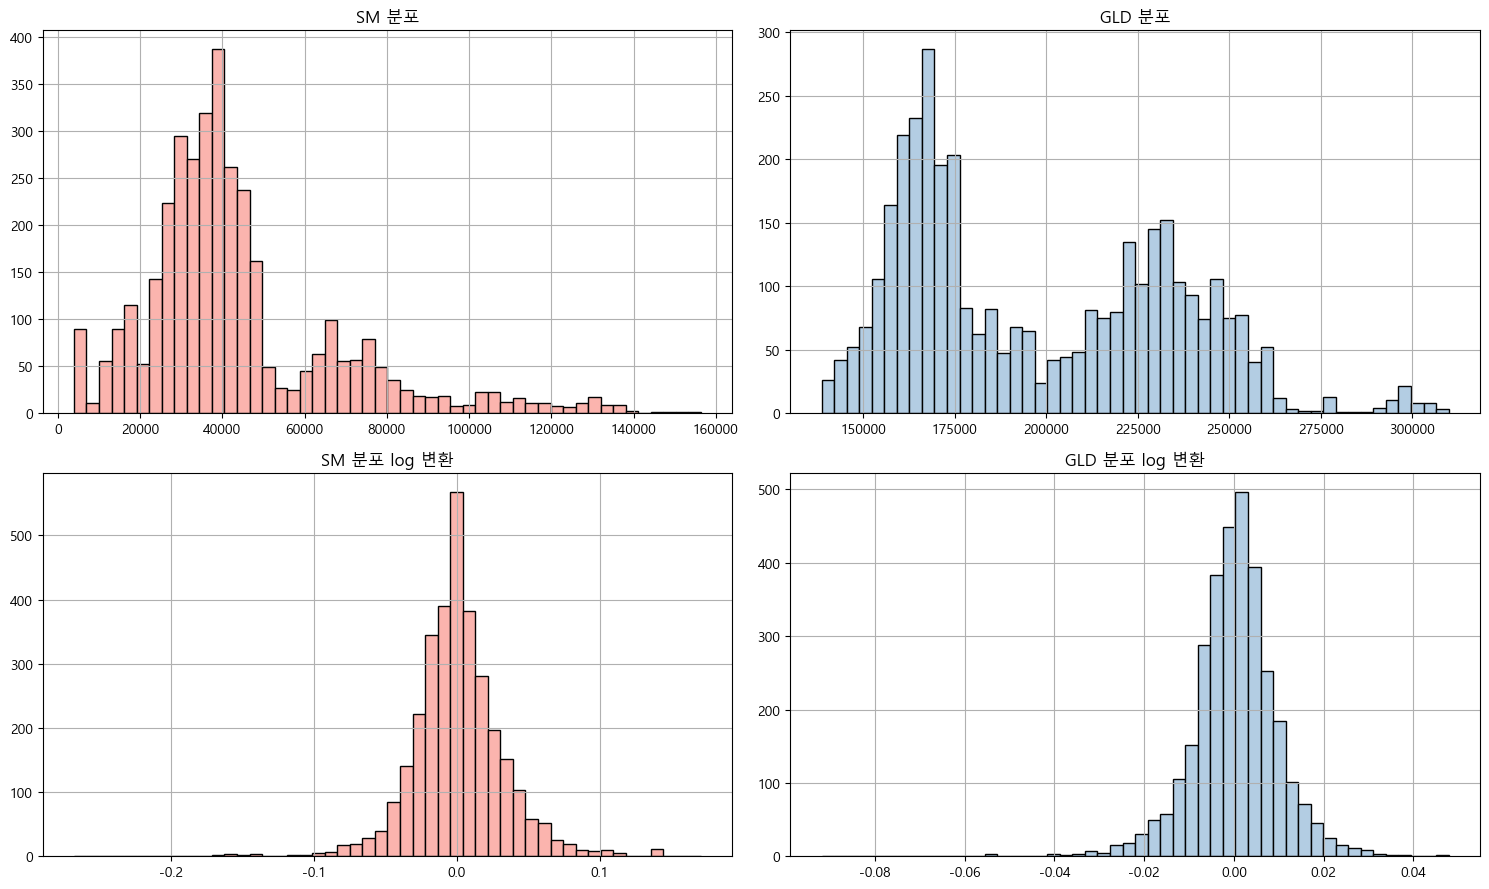

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 크기 설정
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

# SM 분포 시각화
pre_f_df.SM.hist(color=colors[0], edgecolor='black', bins=50, ax=ax[0][0])
ax[0][0].set_title('SM 분포')

# GLD 분포 시각화
pre_f_df.GLD.hist(color=colors[1], edgecolor='black', bins=50, ax=ax[0][1])
ax[0][1].set_title('GLD 분포')

# SM 분포 시각화
rate_f_df.SM.hist(color=colors[0], edgecolor='black', bins=50, ax=ax[1][0])
ax[1][0].set_title('SM 분포 log 변환')

# GLD 분포 시각화
rate_f_df.GLD.hist(color=colors[1], edgecolor='black', bins=50, ax=ax[1][1])
ax[1][1].set_title('GLD 분포 log 변환')


# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

- 데이터 분포와 로그 변환된 데이터 분포를 비교하엿을 때, 정규분포에 가까워진 것을 확인할 수 있다.
- 이로 인해 신뢰성이 향상되었으며, 로그 변환을 통해 일정한 척도로 비교할 수 있는 편의성이 증가했다. 

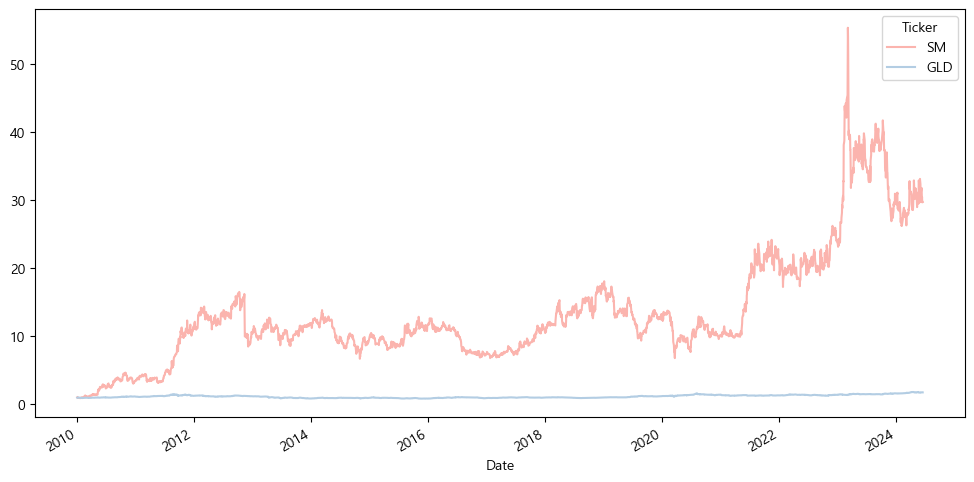

In [18]:
import matplotlib.pyplot as plt

# 일간 수익률
# cumsum = 각 원소들의 누적합의 과정
# exp: 지수 (로그 후 지수 하면 원래 값을 얻을 수 있음)
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6), color=colors)
plt.show()

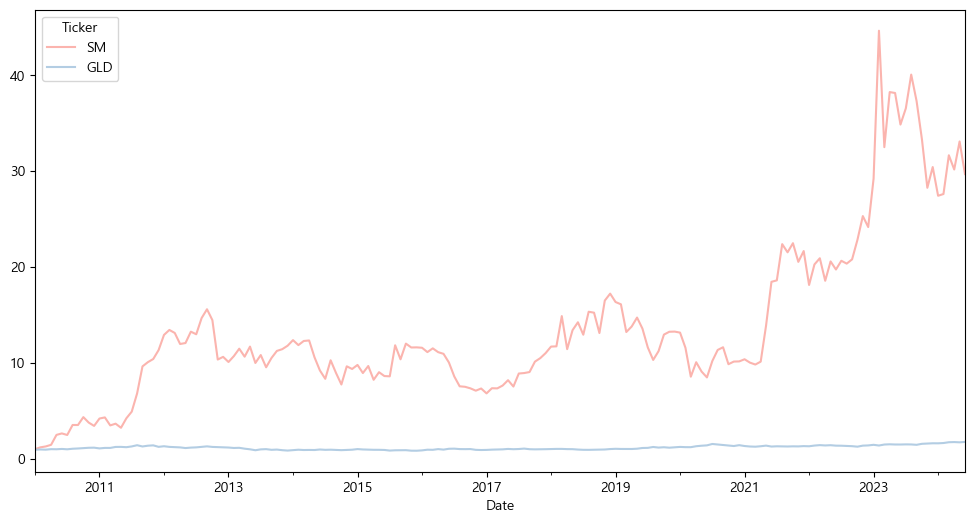

In [19]:
# 월간 수익률
# resample: 단위 리샘플링, 1m = 월 단위로 리샘플링
# last: 리샘플링된 그룹에서 가장 마지막 값을 선택 (월간은 가장 마지막 값이 필요)
# 즉, 각 월의 마지막 날에 해당하는 데이터 포인트를 선택
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6), color=colors)
plt.show()

- SM의 일간 수익률과 연간 수익률은 2011년 말과 2022년에 변동성이 크게 나타났지만, GLD는 안정적인 패턴을 보였다,
- 월간 수익률은 각 월의 마지막 값을 기준으로 측정되었으며, 월간 수익률 그래프는 일간 수익률 그래프보다 변동성이 적고 더 안정적이다.

<br>

**○ 2011년**
- 2011년 하반기: 그룹 EXO의 데뷔로 인해 수익률이 크게 상승했다.

<img src='./images/sm06.png' width=500px>

<br>

**○ 2021년**
- 5월: 그룹 NCT DREAM의 활동으로 인해 수익률이 크게 상승했다.
- 9월: 그룹 NCT 127의 선주문량 및 판매량이 최다 기록을 세우며 수익률 변동성이 크게 나타났다.

<div>
    <img src='./images/sm07.png' width=500px>
    <img src='./images/sm08.png' width=500px>
</div>

<br>

**○ 2023년**
- 2023년 상반기: 그룹 NCT 127의 음반 판매 및 월드투어 개최 성공으로 수익률이 크게 성장했다.

<div>
    <img src='./images/sm10.png' width=500px>
    <img src='./images/sm09.png' width=500px>
</div>

- 2023년 하반기: 그룹 라이즈의 멤버 홍승한 군의 사생활 논란으로 인하여 수익률이 크게 하락했다.

<img src='./images/sm12.png' width=500px>

<br>

**○ 2024년**
- 2024년 상반기: 그룹 에스파의 멤버 카리나 양의 연애설로 인해 수익률이 크게 하락했다.

<img src='./images/sm11.png' width=500px>

In [20]:
# Nan 값 제거
sm_df = pre_f_df[['SM']].dropna()
sm_df

Ticker,SM
Date,
2010-01-04,4196.3833
2010-01-05,4408.4121
2010-01-06,4240.5562
2010-01-07,4236.1387
2010-01-08,4055.0315
...,...
2024-06-11,83200.0000
2024-06-12,81400.0000
2024-06-13,82000.0000


In [21]:
# 윈도우 크기 지정
window = 20

# 이동평균 후 최솟값 계산
sm_df['min'] = sm_df['SM'].rolling(window=window).min()
# 이동평균 후 평균값 계산
sm_df['mean'] = sm_df['SM'].rolling(window=window).mean()
# 이동평균 후 최댓값 계산
sm_df['max'] = sm_df['SM'].rolling(window=window).max()

# 전체 대상으로 값을 구하는 것이 아니라 윈도우 값이 20이라고 가정하면 20 중 해당하는 값을 구하는 것
# 최댓값을 구한다고 가정했을 때, 1~20 중 최댓값, 2~21 중 최댓값... 이런식으로 들감

# Nan 값 제거
sm_df.dropna()

Ticker,SM,min,mean,max
Date,,,,
2010-01-29,4249.3906,3878.3423,4093.020220,4408.4121
2010-02-01,4236.1387,3878.3423,4095.007990,4408.4121
2010-02-02,4258.2251,3878.3423,4087.498640,4258.2251
2010-02-03,4346.5698,3878.3423,4092.799320,4346.5698
2010-02-04,4426.0806,3878.3423,4102.296415,4426.0806
...,...,...,...,...
2024-06-11,83200.0000,78500.0000,85920.000000,95800.0000
2024-06-12,81400.0000,81000.0000,86065.000000,95800.0000
2024-06-13,82000.0000,81400.0000,86115.000000,95800.0000


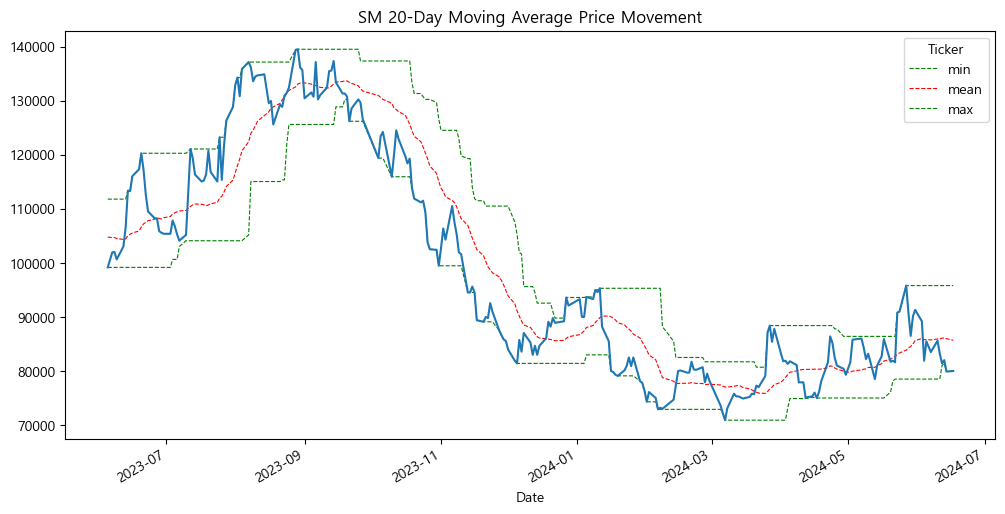

In [22]:
import matplotlib.pyplot as plt

# 최솟값, 평균값, 최댓값의 이동평균 시각화
# 마지막 252일의 데이터 시각화(1년 치)
# 최솟값, 최댓값 초록색 점선으로, 평균값은 빨간색으로 표기
ax = sm_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
# 마지막 252일의 원본 데이터도 함께 표기
sm_df['SM'].iloc[-252:].plot(ax=ax)

plt.title("SM 20-Day Moving Average Price Movement")
plt.show()

- SM 종목의 20일 이동평균 주가 움직임을 확인하였을 때, 최댓값과 최솟값이 감소하는 상황이며, 주가 상승과 하락도 극단적으로 줄어들고 있다.
- 따라서, 최댓값과 최솟값의 감소는 전반적으로 추가가 하락하고 있는 추세를 나타낸다.

In [23]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

sm_df['SMA1'] = sm_df['SM'].rolling(window=21).mean() #short-term (단기)
sm_df['SMA2'] = sm_df['SM'].rolling(window=252).mean() #long-term (장기)
sm_df[['SM', 'SMA1', 'SMA2']].tail()

Ticker,SM,SMA1,SMA2
Date,,,
2024-06-11,83200.0,85790.476190,98994.402220
2024-06-12,81400.0,85704.761905,98889.053850
2024-06-13,82000.0,85871.428571,98784.911768
2024-06-14,79900.0,85819.047619,98703.369419
2024-06-17,80000.0,85690.476190,98621.832341


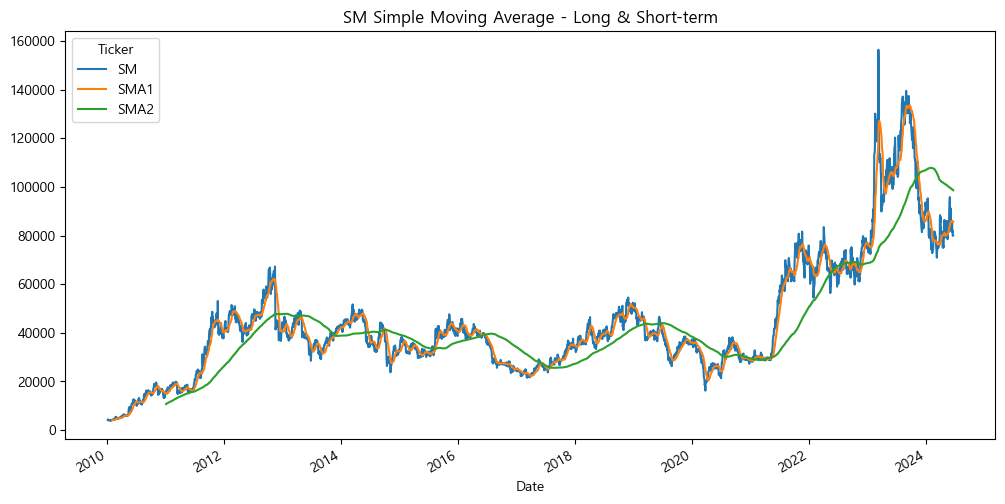

In [24]:
sm_df[['SM', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("SM Simple Moving Average - Long & Short-term")

plt.show()

# 단기가 장기에 비해 내려가면 적극 매도를 해야 하고
# 단기가 장기에 비해 올라가면 골든 크로스로 매수해야 한다.

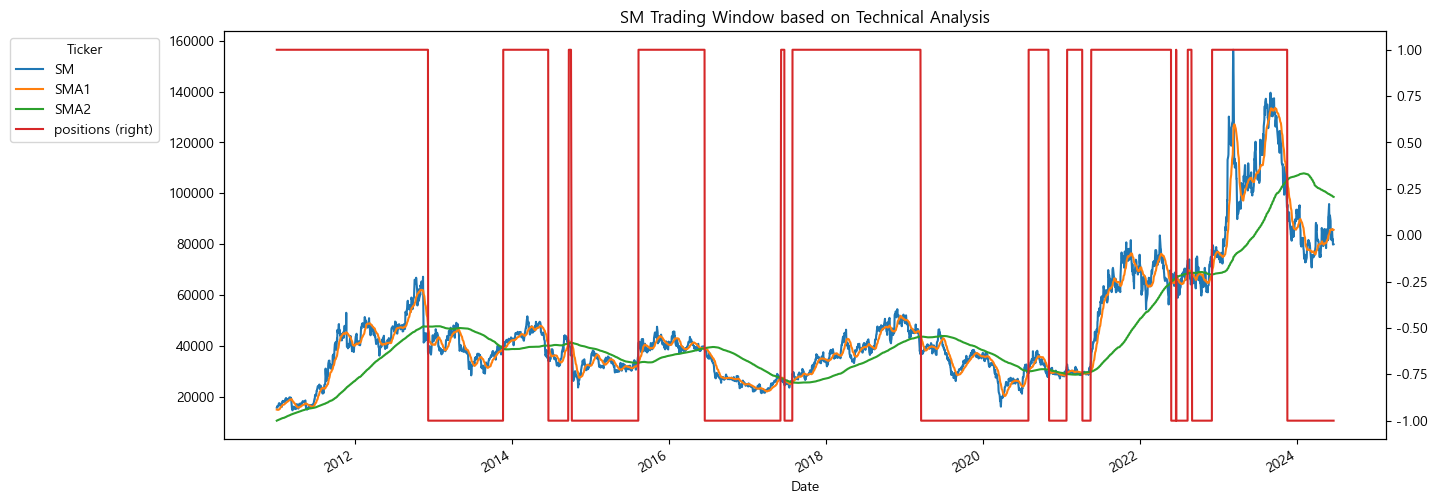

In [25]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스

# 데이터 NaN 값 제거
sm_df.dropna(inplace=True)

# 거래 신호 결정 기준 데이터 후 새로운 컬럼으로 추가
# SMA1이 SMA2 보다 크면 1, 작으면 -1
sm_df['positions'] = np.where(sm_df['SMA1'] > sm_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

# 주식 가격, 이동평균, 거래 신호 데이터 시각화
# secondary_y: 보조 y축 지정 (오른쪽 표기)
ax = sm_df[['SM', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
# 범례를 조정하여 그래프 우측 상단에 표시
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("SM Trading Window based on Technical Analysis")
plt.show()

- 장기 선과 단기 선을 표시하여 골든/데드 크로스를 나타냈다.
- 변화 폭이 가장 컸던 2023년 상반기는 장기가 상승하고 단기가 하락함에 따라 골든 크로스가 발생해 적극 매수가 권장됐고,  
  이후 2023년 하반기에 장기가 하락하고 단기가 상승함에 따라 데드 크로스가 발생해 적극 매도가 권장됐다.

### Ⅱ. 머신러닝

In [26]:
import yfinance as yf
import pandas as pd

# SM 엔터테인먼트 티커를 저장
columns = ['041510.KQ']  

# yfinance 라이브러리를 사용하여 특정 종목 데이터를 다운로드 (소수점 4자리까지 표기, 단일 컬럼이므로 시리즈 형식으로 다운로드)
series_data = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
# 시리즈를 데이터 프레임으로 변환
f_df = pd.DataFrame(series_data)
f_df

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2010-01-04,4196.3838
2010-01-05,4408.4116
2010-01-06,4240.5562
2010-01-07,4236.1392
2010-01-08,4055.0315
...,...
2024-06-11,83200.0000
2024-06-12,81400.0000
2024-06-13,82000.0000


In [27]:
# 데이터 정보 출력
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3555 entries, 2010-01-04 to 2024-06-17
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3555 non-null   float64
dtypes: float64(1)
memory usage: 55.5 KB


In [28]:
# sm엔터테이먼트 컬럼을 명확하게 확인할 수 있도록 컬럼명 변경
pre_f_df = f_df.rename(columns={'Adj Close': 'SM'})
pre_f_df

,SM
Date,
2010-01-04,4196.3838
2010-01-05,4408.4116
2010-01-06,4240.5562
2010-01-07,4236.1392
2010-01-08,4055.0315
...,...
2024-06-11,83200.0000
2024-06-12,81400.0000
2024-06-13,82000.0000


In [29]:
# 결측치 제거
pre_f_df = pre_f_df.dropna()
pre_f_df

,SM
Date,
2010-01-04,4196.3838
2010-01-05,4408.4116
2010-01-06,4240.5562
2010-01-07,4236.1392
2010-01-08,4055.0315
...,...
2024-06-11,83200.0000
2024-06-12,81400.0000
2024-06-13,82000.0000


In [30]:
# sm의 최근 1년간 데이터 추출
sm_df = pre_f_df[['SM']].iloc[-252:]
sm_df

,SM
Date,
2023-06-05,99165.9297
2023-06-07,101928.7656
2023-06-08,102027.4375
2023-06-09,100646.0234
2023-06-12,103014.1641
...,...
2024-06-11,83200.0000
2024-06-12,81400.0000
2024-06-13,82000.0000


In [31]:
# 데이터 세트 분리 
# 시계열 데이터에서 값을 랜덤하게 섞으면 시계열 데이터의 고유한 특성과 패턴이 손실되어 직접 데이터 세트를 분리해야 한다.

# 앞쪽 80% 데이터를 훈련 데이터로 지정
y_train = sm_df['SM'][:int(0.8 * len(sm_df))]

# 뒷쪽 20% 데이터를 테스트 데이터로 지정
y_test = sm_df['SM'][int(0.8 * len(sm_df)):]

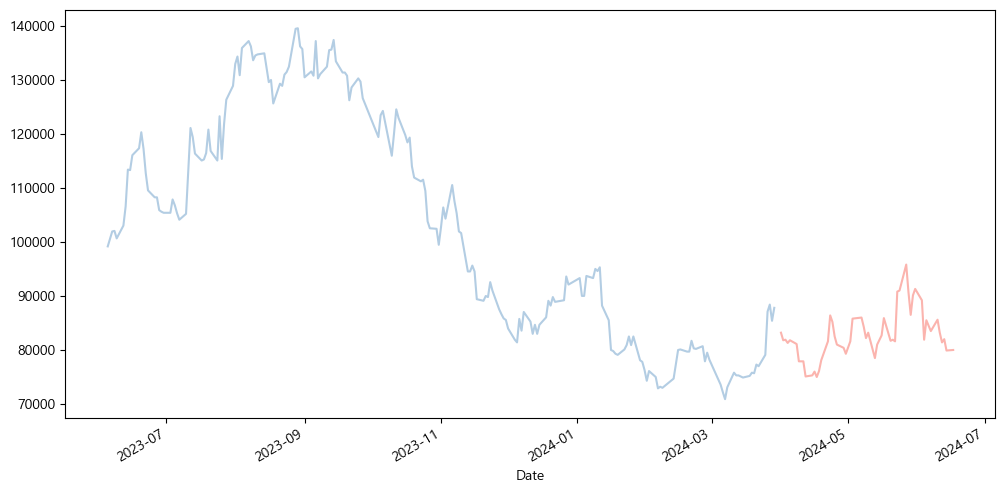

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 분리된 데이터 시각화
y_train.plot(color=colors[1])
y_test.plot(color=colors[0])

plt.show()

- 모델 평가를 위해 전체 데이터의 80%를 훈련 데이터로 나머지 20%를 평가 데이터로 분리했다.

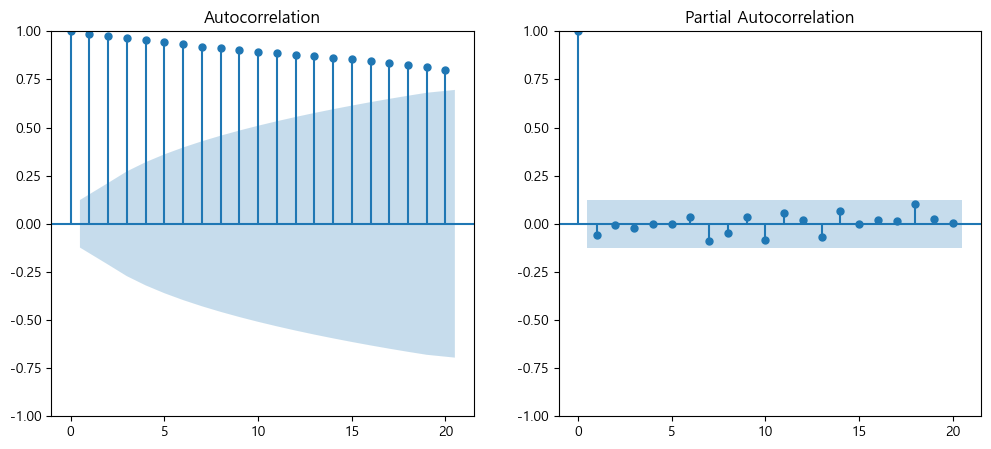

In [33]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 그래프 사이즈 지정
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 정상성 없는 데이터 acf, 차분된 데이터 pacf 계산 및 그래프 생성
# 해당 그래프를 중점으로 확인하기
plot_acf(sm_df, lags=20, ax=ax[0])
plot_pacf(sm_df.diff().dropna(), lags=20, ax=ax[1])


plt.show()

- 좌측 ACF 그래프는 점차 감소하는 상관관계를 보이며, 느리게 감소함에 따라 비정상성을 띄고 있음을 확인할 수 있다.
- 차분 후 우측 PACF 그래프를 시각화하여 정상성을 가지고 있는 것을 확인할 수 있으며, 이는 AR(자기회귀) 모델을 적용하기에 적합하다.

In [34]:
from pmdarima.arima import ndiffs

# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# ★ 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법 ★
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
# 영가설(귀무가설): 통계적 가설 검정에서 처음으로 세우는 기본 가설, 검정하려는 주장이나 효과가 없다는 가정(두 변수간의 상관관계가 없음)

# KPSS, ADF, PP 테스트를 통해 차분 횟수 계산
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

# 필요한 최적의 차분 횟수 계산
n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

# 최적의 차분 횟수 출력
print(f'd = {n_diffs}')

d = 1


In [35]:
import pmdarima as pm

# 최적의 파라미터 값 계산
# 예로, q 값을 가장 먼저 찾아내고 거기에 맞춰서 p 값을 찾아내는 식의 stepwise 단계별 알고리즘을 사용한다.
model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

# y = 훈련할 시계열 데이터
# d = 차분횟수, 테스트 검정을 통해 값을 찾기(미설정 시 오래걸림)
# start_p = AR 시작 차수, max_p = AR 최대 차수
# start_q = MA 시작 차수, max_q = MA 최대 차수
# m=계절성 (defalut=1, 1이면 계절성이 없다는 뜻으로 seasonal 미작성 가능)
# seasonal=계절성 모델 여부 지정 (defalut=False)
# stepwise=단계별 알고리즘 사용 여부
# trace=모델 검색 과정 속 각 단계의 진행 상황 출력 여부 (cnn의 verbose와 유사)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3786.576, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3788.339, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3788.347, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3784.646, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3790.347, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.068 seconds


In [36]:
# 훈련
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

- 검정을 통해 1차분이 가장 좋은 것으로 나타났으며, 오토 아리마를 통해 최적의 파라미터 값을 도출했다.
- ARIMA(0,1,0)이 최적의 모델로 나타났다.

In [37]:
# 모델의 요약 정보 출력
print(model.summary())

# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

# 아마존 주식은 독립성을 보이나 수익률이 일정하지 않기 때문에 장기 보다는 중장기 방향성 또는 단기로 방향을 잡아야 한다. (Prob(JB)가 0.05 이상이라면 장기)
# 즉, 지속적으로 동일한 수익률이 나타나기 어려워 보이며, 고위험군까지는 아니더라도 중립이거나 위험도가 조금 있을 것이다.
# 이러한 내용을 토대로 투자 전략을 세울 수 있다.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1891.323
Date:                Tue, 18 Jun 2024   AIC                           3784.646
Time:                        01:28:57   BIC                           3787.944
Sample:                             0   HQIC                          3785.980
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.534e+06   5.86e+05     16.282      0.000    8.39e+06    1.07e+07
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               103.21
Prob(Q):                              0.45   Pr

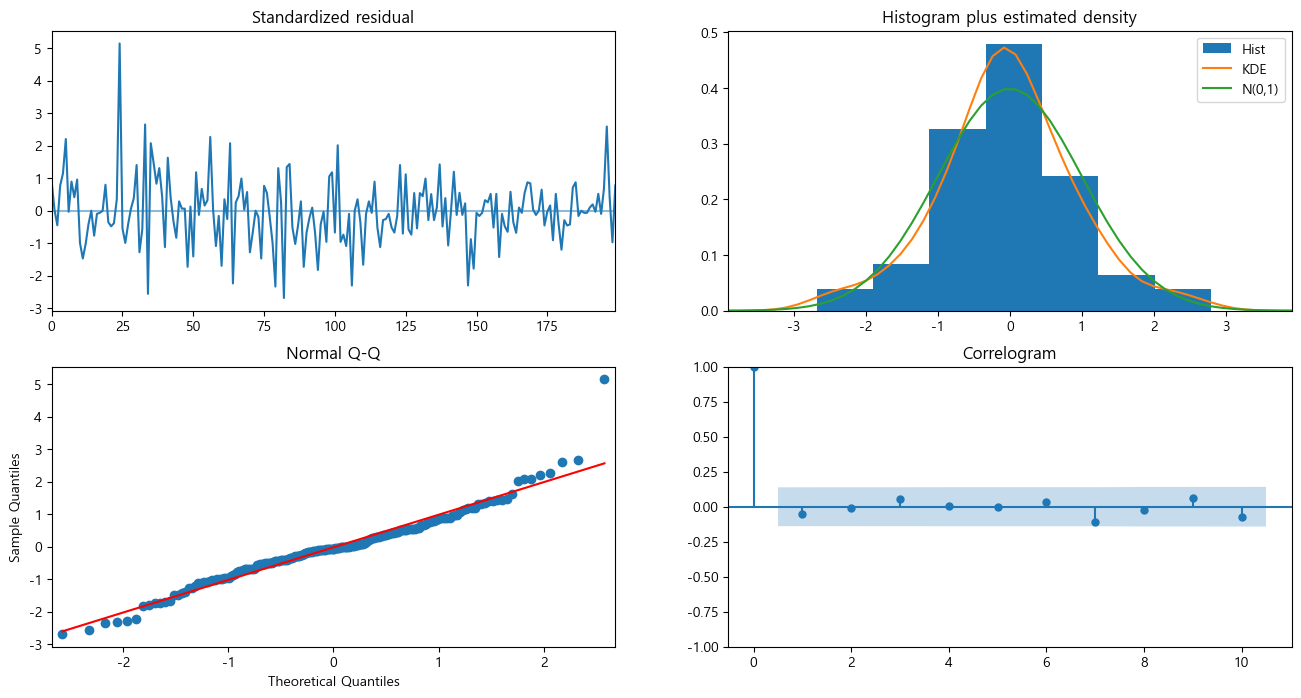

In [38]:
import matplotlib.pyplot as plt

# 모델 진단 그래픽
model.plot_diagnostics(figsize=(16, 8))
plt.show()

- Prob(Q), 융-박스 검정 통계량 수치가 0.58로 나타났고,  
  코렐로그램에서도 0 주변에 안착(정상 시계열) 했기 때문에 잔차가 독립적이라고 보여진다.  
    따라서 시계열 데이터에서의 자기상관 구조가 없어 보인다.
  
- Prob(H), 이분산성 검정 통계량 수치가 0.00으로 나타났고,  
  스탠다다이즈드 레지듀얼스에서 잔차의 분산이 일정하지 않음에 따라 이분산성이 있다고 보여진다.
  
- Prob(JB), 자크-베라 검정 통계량 수치가 0.00으로 나타났고,  
  노멀 큐-큐에서 잔차가 45도 선상에 분포되어 있지 않기 때문에 정규분포를 따르지 않는다고 보여진다.
  
- Skew, 왜도 수치는 0.62으로 나타났고 Kurtosis, 첨도 수치는 6.30으로 나타났다.  
  히스토그램에서 종목인 KDE가 정규분포인 N보다 조금 더 우측으로 쏠리고 뾰족한 것으로 보여진다.

In [39]:
# 학습 데이터 확인
y_train

Date
2023-06-05     99165.9297
2023-06-07    101928.7656
2023-06-08    102027.4375
2023-06-09    100646.0234
2023-06-12    103014.1641
                 ...     
2024-03-25     79100.0000
2024-03-26     87100.0000
2024-03-27     88400.0000
2024-03-28     85400.0000
2024-03-29     87800.0000
Name: SM, Length: 201, dtype: float64

In [40]:
y_test

Date
2024-04-01    83200.0
2024-04-02    81800.0
2024-04-03    81900.0
2024-04-04    81300.0
2024-04-05    81800.0
2024-04-08    81100.0
2024-04-09    77900.0
2024-04-11    77900.0
2024-04-12    75100.0
2024-04-15    75300.0
2024-04-16    76000.0
2024-04-17    75000.0
2024-04-18    76100.0
2024-04-19    78100.0
2024-04-22    81600.0
2024-04-23    86400.0
2024-04-24    85200.0
2024-04-25    82500.0
2024-04-26    81000.0
2024-04-29    80400.0
2024-04-30    79300.0
2024-05-02    81600.0
2024-05-03    85800.0
2024-05-07    86000.0
2024-05-08    84300.0
2024-05-09    82200.0
2024-05-10    83200.0
2024-05-13    78500.0
2024-05-14    81000.0
2024-05-16    82700.0
2024-05-17    85900.0
2024-05-20    81700.0
2024-05-21    81900.0
2024-05-22    81600.0
2024-05-23    90800.0
2024-05-24    91000.0
2024-05-27    95800.0
2024-05-28    90700.0
2024-05-29    86500.0
2024-05-30    90100.0
2024-05-31    91300.0
2024-06-03    89200.0
2024-06-04    81900.0
2024-06-05    85500.0
2024-06-07    83500.0
2024-

In [41]:
# 예측
# n_periods: 예측 기간 지정
prediction = model.predict(n_periods=len(y_test))
prediction

# len(y_test)만큼의 기간 동안의 예측을 수행한다.
# 예측을 기반으로 주어진 입력 데이터의 패턴 및 동향을 고려하여 값을 예상하는데,
# 새로운 데이터가 들어오면 해당 데이터를 사용하여 모델을 업데이트해야만 추가적인 예측이 수행된다.

C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


201    87800.0
202    87800.0
203    87800.0
204    87800.0
205    87800.0
206    87800.0
207    87800.0
208    87800.0
209    87800.0
210    87800.0
211    87800.0
212    87800.0
213    87800.0
214    87800.0
215    87800.0
216    87800.0
217    87800.0
218    87800.0
219    87800.0
220    87800.0
221    87800.0
222    87800.0
223    87800.0
224    87800.0
225    87800.0
226    87800.0
227    87800.0
228    87800.0
229    87800.0
230    87800.0
231    87800.0
232    87800.0
233    87800.0
234    87800.0
235    87800.0
236    87800.0
237    87800.0
238    87800.0
239    87800.0
240    87800.0
241    87800.0
242    87800.0
243    87800.0
244    87800.0
245    87800.0
246    87800.0
247    87800.0
248    87800.0
249    87800.0
250    87800.0
251    87800.0
dtype: float64

- y_test 길이만큼의 기간 동안의 예측을 수행 시  
  주어진 입력 데이터의 패턴 및 동향을 고려하여 값을 예상하는데,  
  모델이 현재 사용 중인 데이터에 대해서만 학습하기 때문에 동일한 값만 나타나고 있다.
- 따라서, 모델 업데이트를 해야만 추가적인 예측이 제대로 수행된다.

In [42]:
# 예측
# return_conf_int: 신뢰구간 반환 여부
prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
print(conf_int) # 신뢰구간 (최댓값, 최솟값 list로 반환)
print(prediction) # 예측값

# 신뢰구간은 예측값의 범위를 나타내며, 이 범위 내에 새로운 데이터가 포함되면 모델의 예측이 일치한다고 간주된.
# 신뢰구간의 중심에 있는 값(평균값)을 예측값으로 사용하여 모델의 예측을 보다 신뢰성 있게 수행한다.

[[81748.25615207 93851.74384793]]
201    87800.0
dtype: float64


C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
# 예측 함수 선언
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [44]:
# 예측값 담을 초기 list 선언 (시각화를 위함)
p_list = []

for data in y_test:
    # 예측 함수로 예측값 가져오기
    p = predict_one_step()
    # 예측값 저장
    p_list.append(p)

    # 모델 업데이트
    model.update(data)

C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
# test 값과 예측값을 데이터 프레임으로 생성
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2024-04-01,83200.0,87800.0
2024-04-02,81800.0,83200.0
2024-04-03,81900.0,81800.0
2024-04-04,81300.0,81900.0
2024-04-05,81800.0,81300.0
2024-04-08,81100.0,81800.0
2024-04-09,77900.0,81100.0
2024-04-11,77900.0,77900.0
2024-04-12,75100.0,77900.0


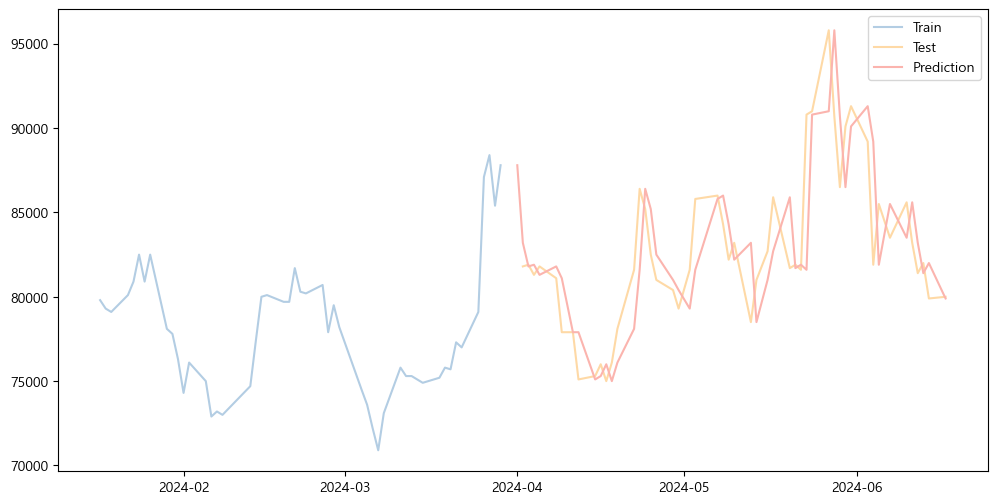

In [46]:
import matplotlib.pyplot as plt

# 그래프 크기 지정
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 특정 train 데이터
plt.plot(y_train.iloc[-50:], label='Train', color=colors[1])
# 특정 test 데이터
plt.plot(y_test.iloc[-50:], label='Test', color=colors[4])
# 예측 데이터
plt.plot(y_predict_df.pred, label='Prediction', color=colors[0])

plt.legend()
plt.show()

In [47]:
import numpy as np

# 평균 오차율 계산 함수 선언
def MAPE(y_test, y_pred):
    # 각 예측값에 대한 상대적인 오차율을 계산
    # abs: 절댓값 계산
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 함수를 통해 오차율 출력
print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 2.6830


- 실제 값을 알고 있어야 예측이 되기 때문에 한 스텝 씩 업데이트를 하여 예측한 결과  
  2.6879% 센트의 오차가 있으나 시각화 자료를 확인하였을 때, 거의 유사한 것을 알 수 있었다.
- 시계열 데이터는 실제 데이터와 모델의 예측 값을 비교하여 모델의 평가를 위해 사용되는 것으로 미래이의 값을 예측하기는 어렵다.  
  따라서 딥러닝에서 미래를 예측해보기로 한다.

### Ⅲ. 딥러닝

#### 1cycle

In [48]:
import yfinance as yf
import pandas as pd

# SM 엔터테인먼트 티커를 저장
columns = ['041510.KQ']  

# yfinance 라이브러리를 사용하여 특정 종목 데이터를 다운로드 (소수점 4자리까지 표기, 단일 컬럼이므로 시리즈 형식으로 다운로드)
series_data = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
# 시리즈를 데이터 프레임으로 변환
f_df = pd.DataFrame(series_data)
# 인덱스를 연도로 변경
f_df.reset_index(inplace=True)
f_df

[*********************100%%**********************]  1 of 1 completed


,Date,Adj Close
0,2010-01-04,4196.3838
1,2010-01-05,4408.4116
2,2010-01-06,4240.5562
3,2010-01-07,4236.1392
4,2010-01-08,4055.0315
...,...,...
3550,2024-06-11,83200.0000
3551,2024-06-12,81400.0000
3552,2024-06-13,82000.0000
3553,2024-06-14,79900.0000


In [49]:
# 데이터 정보 출력
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3555 non-null   datetime64[ns]
 1   Adj Close  3555 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.7 KB


In [50]:
# Prophet 모델 사용을 위해 ds, y로 컬럼명 변경
pre_f_df = f_df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
pre_f_df

,ds,y
0,2010-01-04,4196.3838
1,2010-01-05,4408.4116
2,2010-01-06,4240.5562
3,2010-01-07,4236.1392
4,2010-01-08,4055.0315
...,...,...
3550,2024-06-11,83200.0000
3551,2024-06-12,81400.0000
3552,2024-06-13,82000.0000
3553,2024-06-14,79900.0000


In [51]:
# sm의 최근 1년간 데이터 추출
sm_df = pre_f_df.iloc[-252:].reset_index(drop=True)
sm_df

,ds,y
0,2023-06-05,99165.9297
1,2023-06-07,101928.7656
2,2023-06-08,102027.4375
3,2023-06-09,100646.0234
4,2023-06-12,103014.1641
...,...,...
247,2024-06-11,83200.0000
248,2024-06-12,81400.0000
249,2024-06-13,82000.0000
250,2024-06-14,79900.0000


In [52]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# 파라미터 값 지정
# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default (10.0 이상은 비추천)
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
# additive: 더하기, multiplicative: 곱하기
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
# *unpacking으로 값을 풀어 가져오고 zip을 사여 key와 묶어 dict 형식으로 저장  
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

# 전체 데이터 80% 개수 저장
train_len = int(len(sm_df) * 0.8)
# 전체 데이터 20% 개수 저장
test_len = int(len(sm_df) * 0.2)

# 훈련 사이즈 지정
train_size = f'{train_len} days'
# 테스트 사이즈 지정
test_size = f'{test_len} days'
# 훈련 데이터 세트 분리 (상위 80%)
train_df = sm_df.iloc[: train_len]
# 테스트 데이터 세트 분리 (하위 20%)
test_df = sm_df.iloc[train_len: ]

# 평균 절대 백분율 오차(MAPE) 저장하기 위해 초기 list 생성
mapes = []

for param in param_combinded:
    # 파라미터 값이 dict 형식이기 때문에 unpacking하여 Prophet 모델에 전달
    model = Prophet(**param)
    # 훈련
    model.fit(train_df)

    # cross_validation
    # initial=초기 학습 기간, period=교차 검증을 수행할 각 반복의 기간, horizon=예측할 기간, parallel=병렬 처리를 사용하여 교차 검증 수행 여부
    # parallel 옵션은 아래와 같다.
    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    # 교차 검증 결과를 평가
    # performance_metrics(교차 검증을 수행한 후 얻은 데이터프레임, rolling_window=이동 평균 계산)
    df_p = performance_metrics(cv_df, rolling_window=1)
    # 데이터 프레임에서 mape 값을 추출하여 list에 저장
    # mape이 제일 낮은게 우리 가 사용해야할 파라미터 값이 된다.
    mapes.append(df_p['mape'].values[0])

# 매개변수 조합을 포함하는 데이터프레임 생성
tuning_result = pd.DataFrame(param_combinded)
# 평균 절대 백분율 오차(MAPE) 값을 컬럼으로 추가
tuning_result['mape'] = mapes

01:29:02 - cmdstanpy - INFO - Chain [1] start processing
01:29:02 - cmdstanpy - INFO - Chain [1] done processing
01:29:04 - cmdstanpy - INFO - Chain [1] start processing
01:29:04 - cmdstanpy - INFO - Chain [1] done processing
01:29:06 - cmdstanpy - INFO - Chain [1] start processing
01:29:06 - cmdstanpy - INFO - Chain [1] done processing
01:29:07 - cmdstanpy - INFO - Chain [1] start processing
01:29:07 - cmdstanpy - INFO - Chain [1] done processing
01:29:09 - cmdstanpy - INFO - Chain [1] start processing
01:29:09 - cmdstanpy - INFO - Chain [1] done processing
01:29:11 - cmdstanpy - INFO - Chain [1] start processing
01:29:11 - cmdstanpy - INFO - Chain [1] done processing
01:29:13 - cmdstanpy - INFO - Chain [1] start processing
01:29:13 - cmdstanpy - INFO - Chain [1] done processing
01:29:15 - cmdstanpy - INFO - Chain [1] start processing
01:29:15 - cmdstanpy - INFO - Chain [1] done processing
01:29:16 - cmdstanpy - INFO - Chain [1] start processing
01:29:16 - cmdstanpy - INFO - Chain [1]

In [53]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
10,0.10,0.10,additive,0.084216
12,0.10,1.00,additive,0.084676
9,0.10,0.05,multiplicative,0.084680
14,0.10,10.00,additive,0.085186
8,0.10,0.05,additive,0.085821
7,0.05,10.00,multiplicative,0.085949
11,0.10,0.10,multiplicative,0.086871
5,0.05,1.00,multiplicative,0.087164
1,0.05,0.05,multiplicative,0.098131
4,0.05,1.00,additive,0.100824


```
'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
'seasonality_mode': ['additive', 'multiplicative']
```

<br>

- 위 파라미터 값과 1년치 데이터를 통해 최적의 파라미터 값을 탐색한 결과 로스 값 약 0.0842으로 나오는,  
  changepoint_prior_scale=0.10,  
  seasonality_prior_scale=0.10,  
  seasonality_mode='additive'이 가장 최적의 파라미터로 나타났다.

In [54]:
# loss 값이 제일 낮은 파라미터 값 가져와서 담기 
# 최적의 모델!
model = Prophet(changepoint_prior_scale=0.10, 
                seasonality_prior_scale=0.10, 
                seasonality_mode='additive')

# 훈련
model.fit(sm_df)

# Prophet 모델을 사용하여 미래의 예측값을 생성한다.
# make_future_dataframe: 미래의 일정한 기간에 해당하는 날짜를 포함하는 DataFrame 생성
future = model.make_future_dataframe(periods=365)

# 예측
# 미래의 날짜 정보가 포함된 future DataFrame 사용
forecast = model.predict(future)
# 예측 결과 중 특정 컬럼 추출하여 출력
# ds: 날짜, yhat: 해당 날짜의 예측값, yhat_lower: 예측값 하한, yhat_upper: 예측값 상한
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

01:30:33 - cmdstanpy - INFO - Chain [1] start processing
01:30:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2023-06-05,101742.962992,96147.472916,107747.209138
1,2023-06-07,103372.040150,98176.721962,109333.865096
2,2023-06-08,103523.087639,98025.281060,109339.006053
3,2023-06-09,103697.241430,97851.938480,110039.689489
4,2023-06-12,104611.607868,98543.872658,110331.882775
...,...,...,...,...
612,2025-06-13,118932.727173,-1620.850646,249299.558920
613,2025-06-14,119098.862103,-778.651066,247992.356413
614,2025-06-15,119189.459112,-4517.187385,248721.952052
615,2025-06-16,118889.465074,-6011.385966,252070.115030


In [55]:
# 데이터 프레임 복제
pre_sm_df = sm_df.copy()
# 특정 컬럼을 인덱스로 지정
pre_sm_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

pre_sm_df.index = pd.to_datetime(pre_sm_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

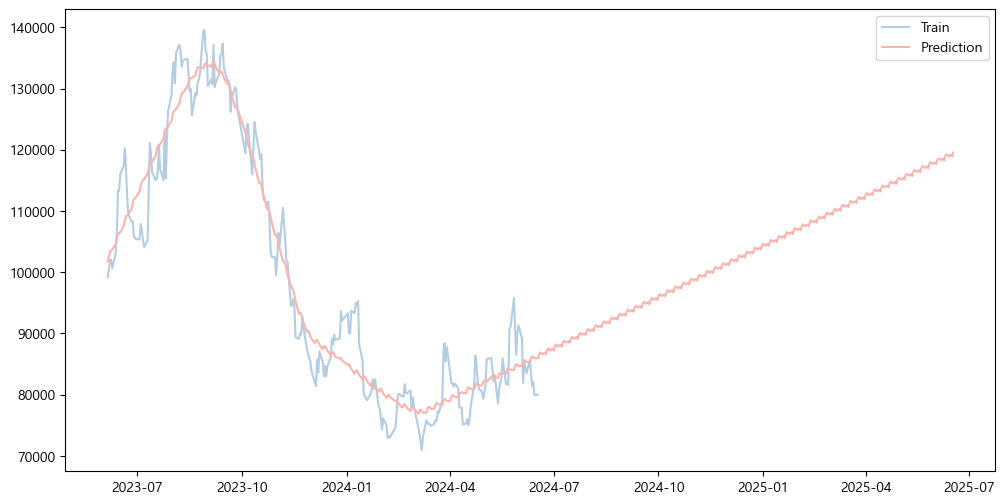

In [56]:
# 그래프 사이즈 지정
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 훈련 데이터
plt.plot(pre_sm_df[['y']], label='Train', color=colors[1])
# 예측 데이터
plt.plot(forecast_df[['yhat']], label='Prediction', color=colors[0])

plt.legend()
plt.show()

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


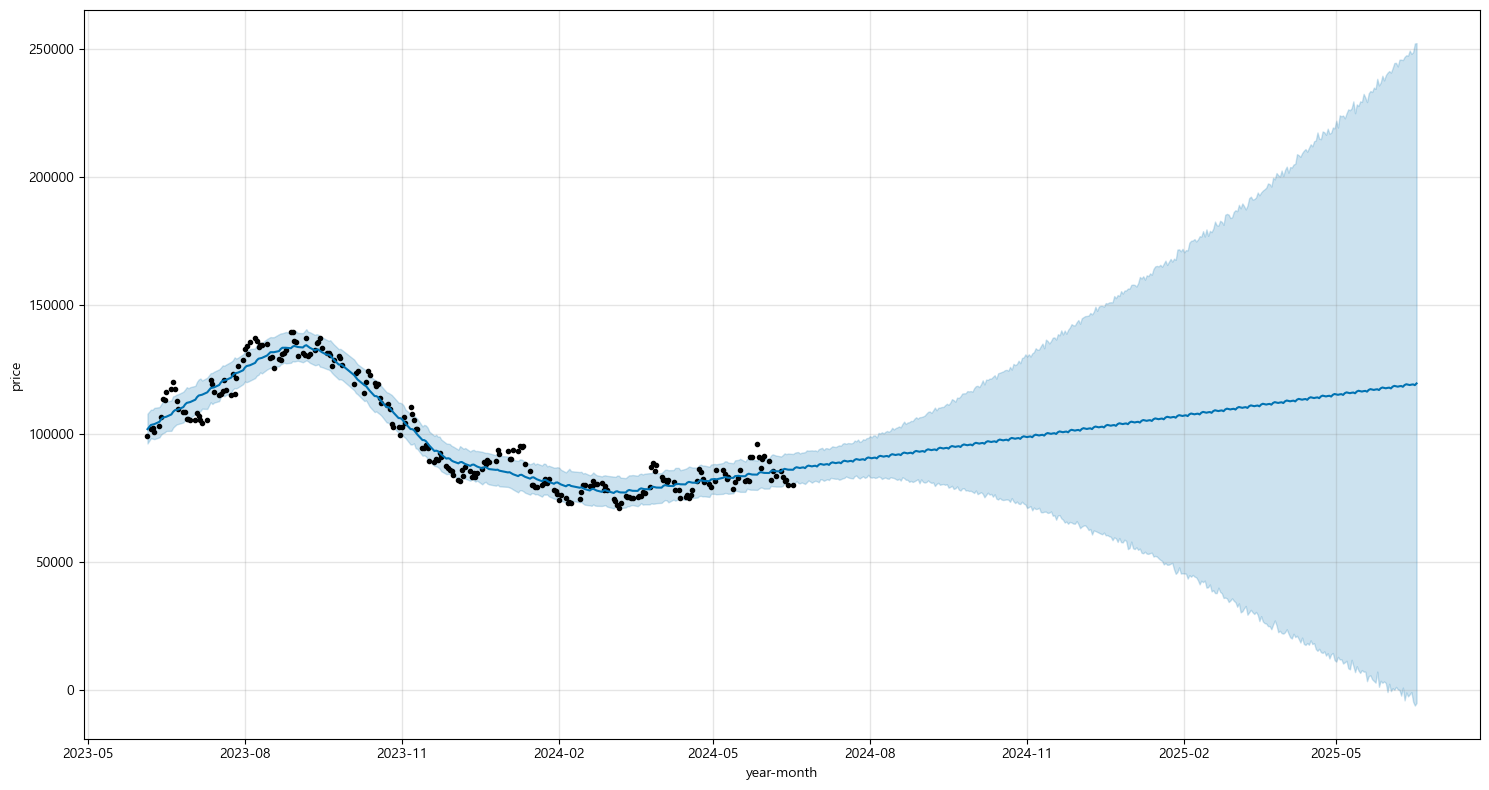

In [57]:
# 예측 결과 데이터 프레임의 정보로 시각화
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')

plt.show()

- 예측 결과 신뢰 구간이 뒤로 갈수록 점점 넓어지는 것을 확인할 수 있었으며,  
  훈련 값이 신뢰 구간에서 조금씩 벗어나는 것으로 보여졌다.
- 따라서, 1년치 데이터로는 정확한 예측이 불가능하다고 판단되어 3년치 데이터로 예측을 시도해보기로 한다.

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


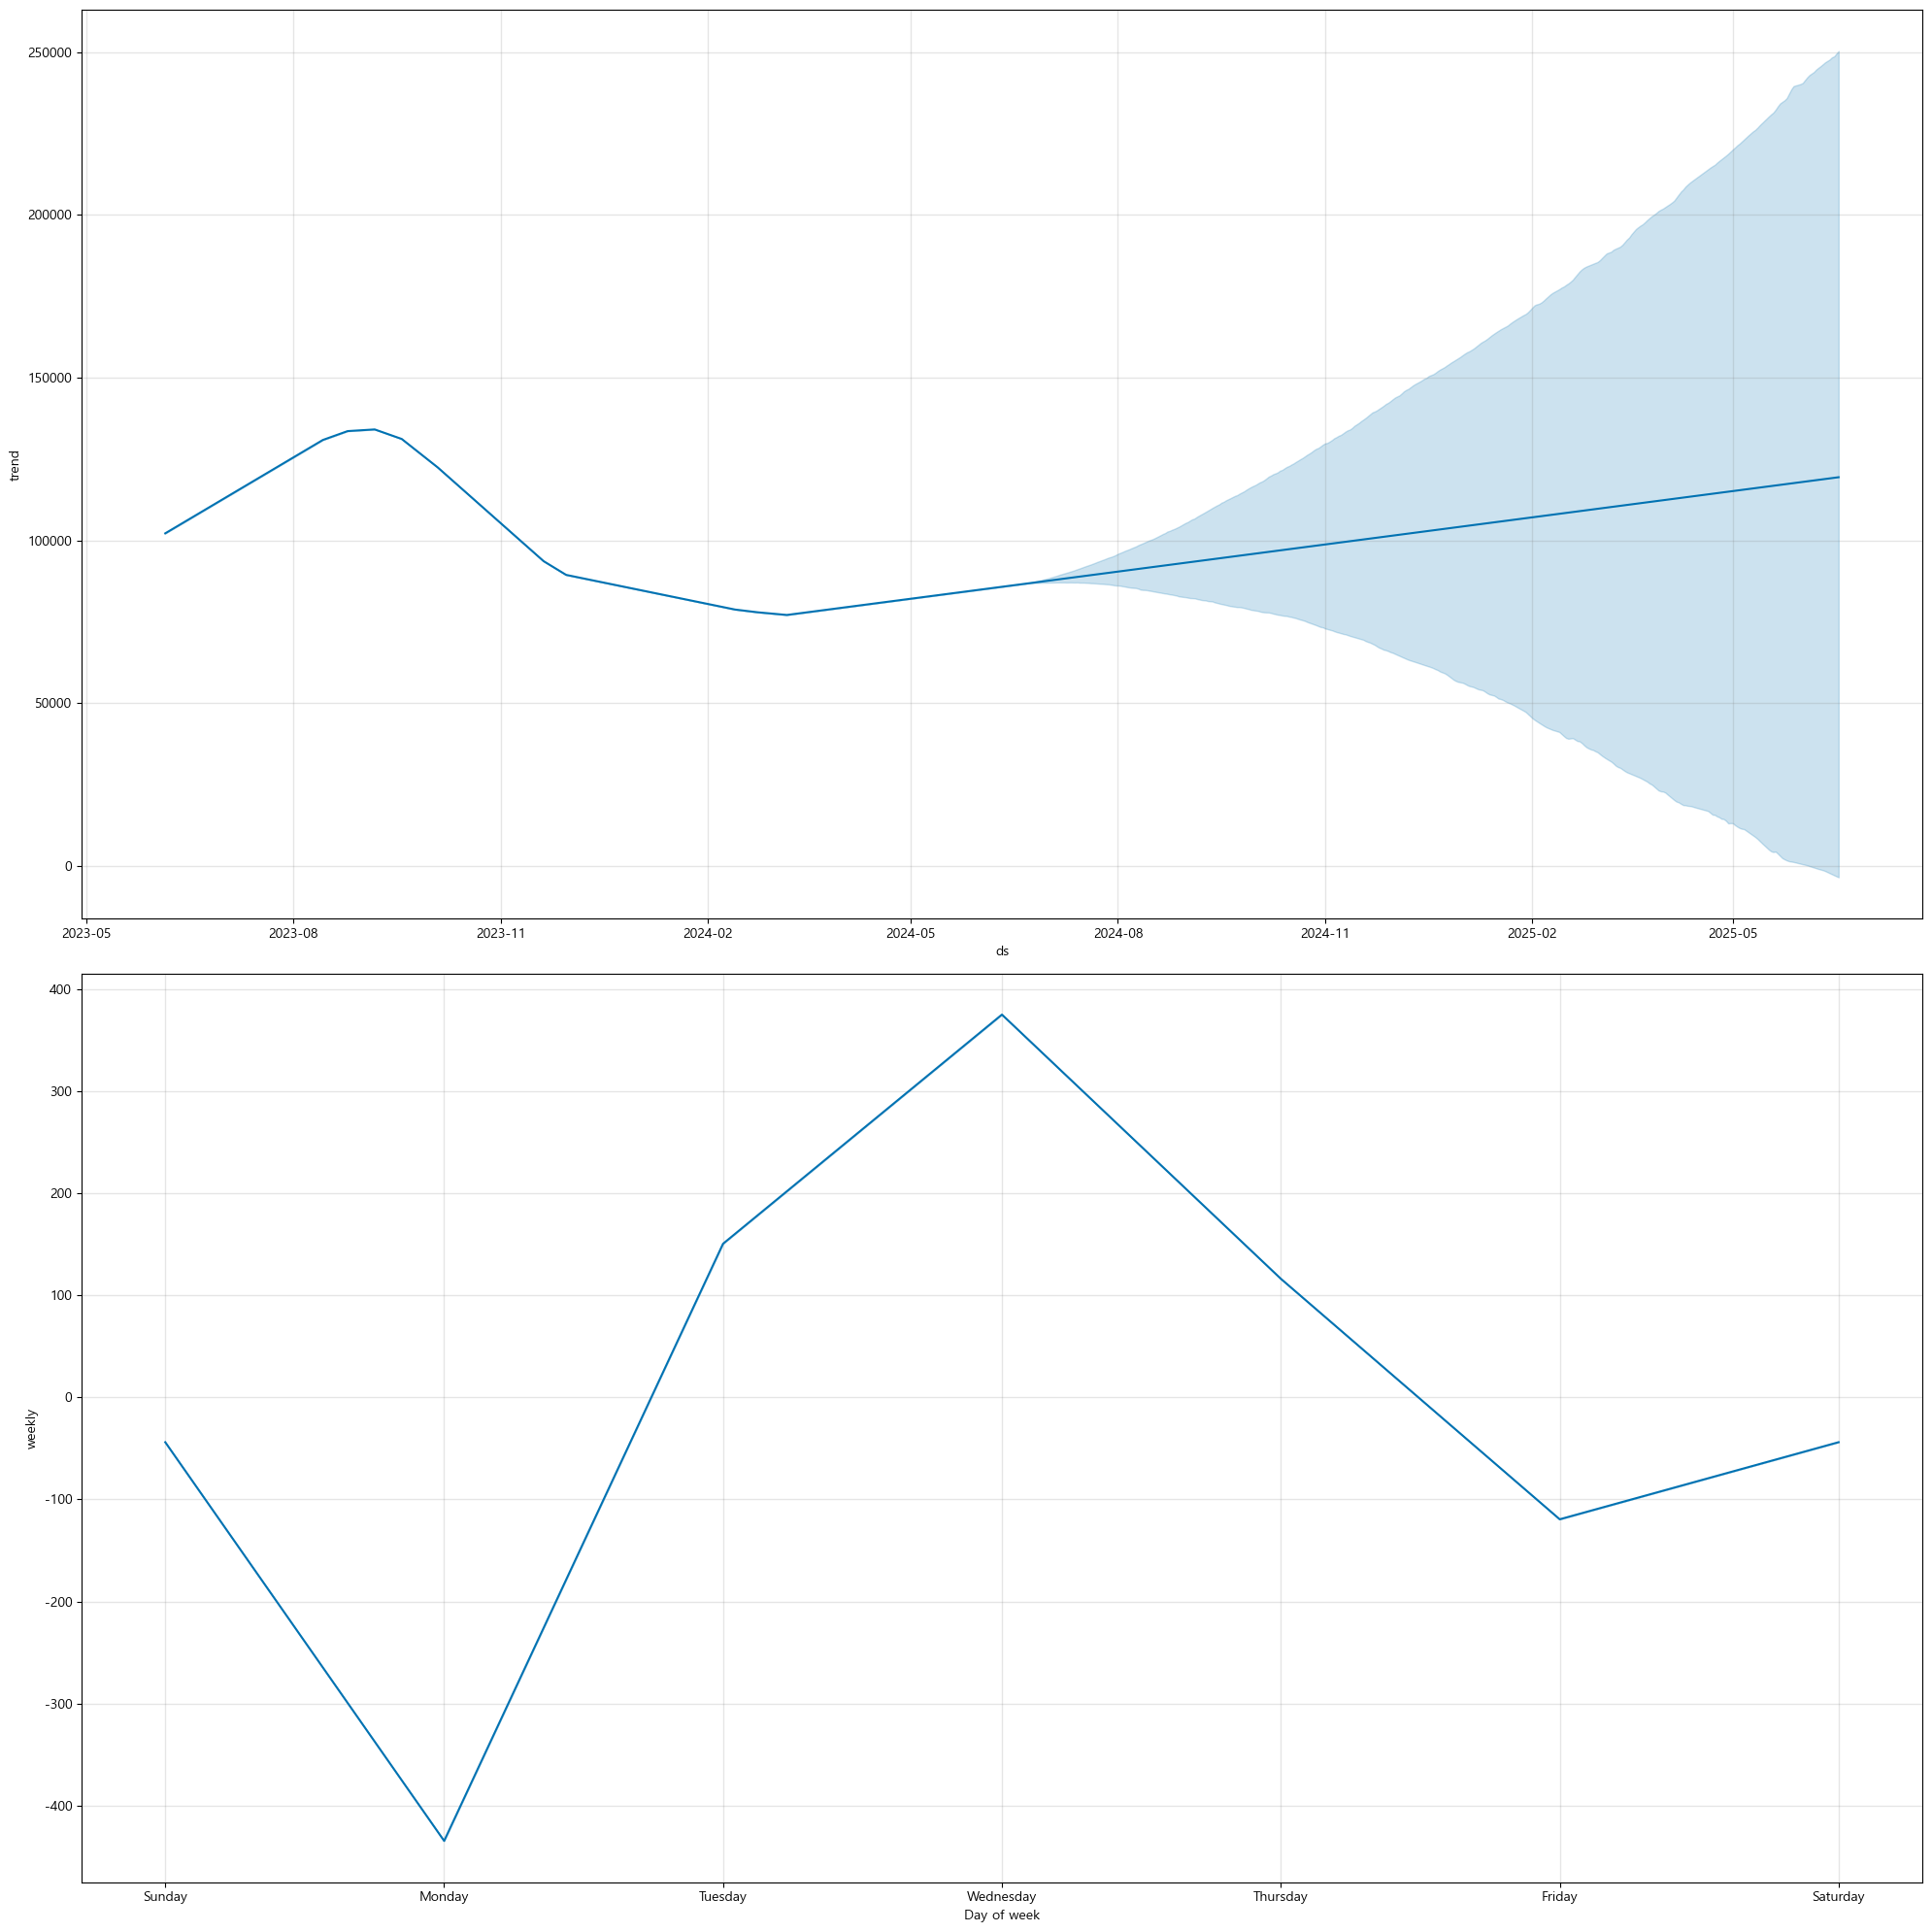

In [58]:
# plot_components(): Prophet 모델의 구성 요소를 시각화
model.plot_components(forecast, figsize=(20, 20))

plt.show()

- 연간 그래프를 보았을 때 2023년 11월 쯤 주가가 크게 하락하는데, 그룹 라이즈의 멤버 홍승한 군의 사생활 논란과 맞물린다.
- 이후 점차 소폭 상승하는 추세를 보인다.

<img src='./images/sm12.png' width=500px>

<br>

- 주간 그래프 확인 시 월요일에 많이 하락하며 수요일에 많이 상승하는 것을 알 수 있었다.

#### 2cycle

In [59]:
# sm의 최근 3년간 데이터 추출
sm2_df = pre_f_df.iloc[-756:].reset_index(drop=True)
sm2_df

,ds,y
0,2021-05-17,34936.0000
1,2021-05-18,37316.8945
2,2021-05-20,37899.9688
3,2021-05-21,38871.7656
4,2021-05-24,38968.9453
...,...,...
751,2024-06-11,83200.0000
752,2024-06-12,81400.0000
753,2024-06-13,82000.0000
754,2024-06-14,79900.0000


In [60]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# 파라미터 값 지정
# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default (10.0 이상은 비추천)
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
# additive: 더하기, multiplicative: 곱하기
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
# *unpacking으로 값을 풀어 가져오고 zip을 사여 key와 묶어 dict 형식으로 저장  
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

# 전체 데이터 80% 개수 저장
train_len = int(len(sm2_df) * 0.8)
# 전체 데이터 20% 개수 저장
test_len = int(len(sm2_df) * 0.2)

# 훈련 사이즈 지정
train_size = f'{train_len} days'
# 테스트 사이즈 지정
test_size = f'{test_len} days'
# 훈련 데이터 세트 분리 (상위 80%)
train_df = sm2_df.iloc[: train_len]
# 테스트 데이터 세트 분리 (하위 20%)
test_df = sm2_df.iloc[train_len: ]

# 평균 절대 백분율 오차(MAPE) 저장하기 위해 초기 list 생성
mapes = []

for param in param_combinded:
    # 파라미터 값이 dict 형식이기 때문에 unpacking하여 Prophet 모델에 전달
    model = Prophet(**param)
    # 훈련
    model.fit(train_df)

    # cross_validation
    # initial=초기 학습 기간, period=교차 검증을 수행할 각 반복의 기간, horizon=예측할 기간, parallel=병렬 처리를 사용하여 교차 검증 수행 여부
    # parallel 옵션은 아래와 같다.
    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    # 교차 검증 결과를 평가
    # performance_metrics(교차 검증을 수행한 후 얻은 데이터프레임, rolling_window=이동 평균 계산)
    df_p = performance_metrics(cv_df, rolling_window=1)
    # 데이터 프레임에서 mape 값을 추출하여 list에 저장
    # mape이 제일 낮은게 우리 가 사용해야할 파라미터 값이 된다.
    mapes.append(df_p['mape'].values[0])

# 매개변수 조합을 포함하는 데이터프레임 생성
tuning_result = pd.DataFrame(param_combinded)
# 평균 절대 백분율 오차(MAPE) 값을 컬럼으로 추가
tuning_result['mape'] = mapes

01:30:42 - cmdstanpy - INFO - Chain [1] start processing
01:30:42 - cmdstanpy - INFO - Chain [1] done processing
01:30:45 - cmdstanpy - INFO - Chain [1] start processing
01:30:45 - cmdstanpy - INFO - Chain [1] done processing
01:30:47 - cmdstanpy - INFO - Chain [1] start processing
01:30:47 - cmdstanpy - INFO - Chain [1] done processing
01:30:50 - cmdstanpy - INFO - Chain [1] start processing
01:30:50 - cmdstanpy - INFO - Chain [1] done processing
01:30:53 - cmdstanpy - INFO - Chain [1] start processing
01:30:53 - cmdstanpy - INFO - Chain [1] done processing
01:30:56 - cmdstanpy - INFO - Chain [1] start processing
01:30:56 - cmdstanpy - INFO - Chain [1] done processing
01:30:59 - cmdstanpy - INFO - Chain [1] start processing
01:30:59 - cmdstanpy - INFO - Chain [1] done processing
01:31:02 - cmdstanpy - INFO - Chain [1] start processing
01:31:02 - cmdstanpy - INFO - Chain [1] done processing
01:31:04 - cmdstanpy - INFO - Chain [1] start processing
01:31:04 - cmdstanpy - INFO - Chain [1]

In [61]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
33,5.00,0.05,multiplicative,0.190932
41,10.00,0.05,multiplicative,0.192084
35,5.00,0.10,multiplicative,0.195644
43,10.00,0.10,multiplicative,0.195917
17,0.50,0.05,multiplicative,0.196006
2,0.05,0.10,additive,0.200943
25,1.00,0.05,multiplicative,0.203064
4,0.05,1.00,additive,0.204002
0,0.05,0.05,additive,0.204120
6,0.05,10.00,additive,0.204151


```
'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
'seasonality_mode': ['additive', 'multiplicative']
```

<br>

- 위 파라미터 값과 3년치 데이터를 통해 최적의 파라미터 값을 탐색한 결과 로스 값 약 0.1911으로 나오는  
  changepoint_prior_scale=5.00,  
  seasonality_prior_scale=0.05,  
  seasonality_mode='multiplicative'이 가장 최적의 파라미터로 나타났으나,  
  multiplicative의 주기성을 더 주려고 하는 특성으로 아래와 같은 그래프가 그려지게 됐다.

<img src='./images/deep01.png' width=800px>

<br>

- 따라서, 기존 파라미터 값에 모드만 'additive'로 변경하여 사용하고자 한다.

In [67]:
# loss 값이 제일 낮은 파라미터 값 가져와서 담기 
# 최적의 모델!
model = Prophet(changepoint_prior_scale=5.00, 
                seasonality_prior_scale=0.05, 
                seasonality_mode='additive')

# 훈련
model.fit(sm2_df)

# Prophet 모델을 사용하여 미래의 예측값을 생성한다.
# make_future_dataframe: 미래의 일정한 기간에 해당하는 날짜를 포함하는 DataFrame 생성
future = model.make_future_dataframe(periods=756)

# 예측
# 미래의 날짜 정보가 포함된 future DataFrame 사용
forecast = model.predict(future)
# 예측 결과 중 특정 컬럼 추출하여 출력
# ds: 날짜, yhat: 해당 날짜의 예측값, yhat_lower: 예측값 하한, yhat_upper: 예측값 상한
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

01:37:17 - cmdstanpy - INFO - Chain [1] start processing
01:37:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-05-17,33514.257466,2.776573e+04,3.906994e+04
1,2021-05-18,34990.109701,2.927235e+04,4.032550e+04
2,2021-05-20,36313.174393,3.106384e+04,4.184090e+04
3,2021-05-21,37202.144057,3.188344e+04,4.269357e+04
4,2021-05-24,38463.784001,3.267000e+04,4.385207e+04
...,...,...,...,...
1507,2026-07-09,-47047.139159,-1.681331e+06,1.613578e+06
1508,2026-07-10,-46946.499255,-1.685296e+06,1.620065e+06
1509,2026-07-11,-47107.224017,-1.691377e+06,1.626280e+06
1510,2026-07-12,-47155.570207,-1.697815e+06,1.623643e+06


In [68]:
# 데이터 프레임 복제
pre_sm2_df = sm2_df.copy()
# 특정 컬럼을 인덱스로 지정
pre_sm2_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

pre_sm2_df.index = pd.to_datetime(pre_sm2_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

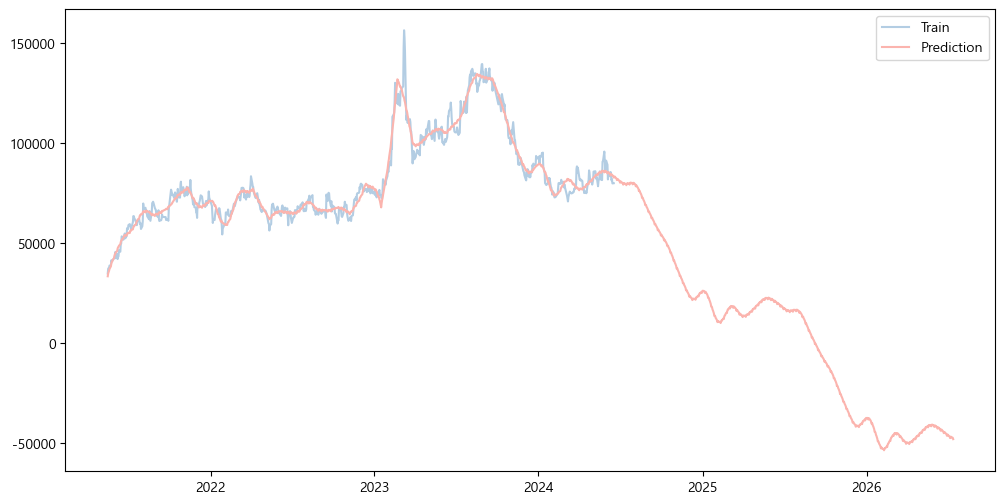

In [69]:
import matplotlib.pyplot as plt

# 그래프 사이즈 지정
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 훈련 데이터
plt.plot(pre_sm2_df[['y']], label='Train', color=colors[1])
# 예측 데이터
plt.plot(forecast_df[['yhat']], label='Prediction', color=colors[0])

plt.legend()
plt.show()

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


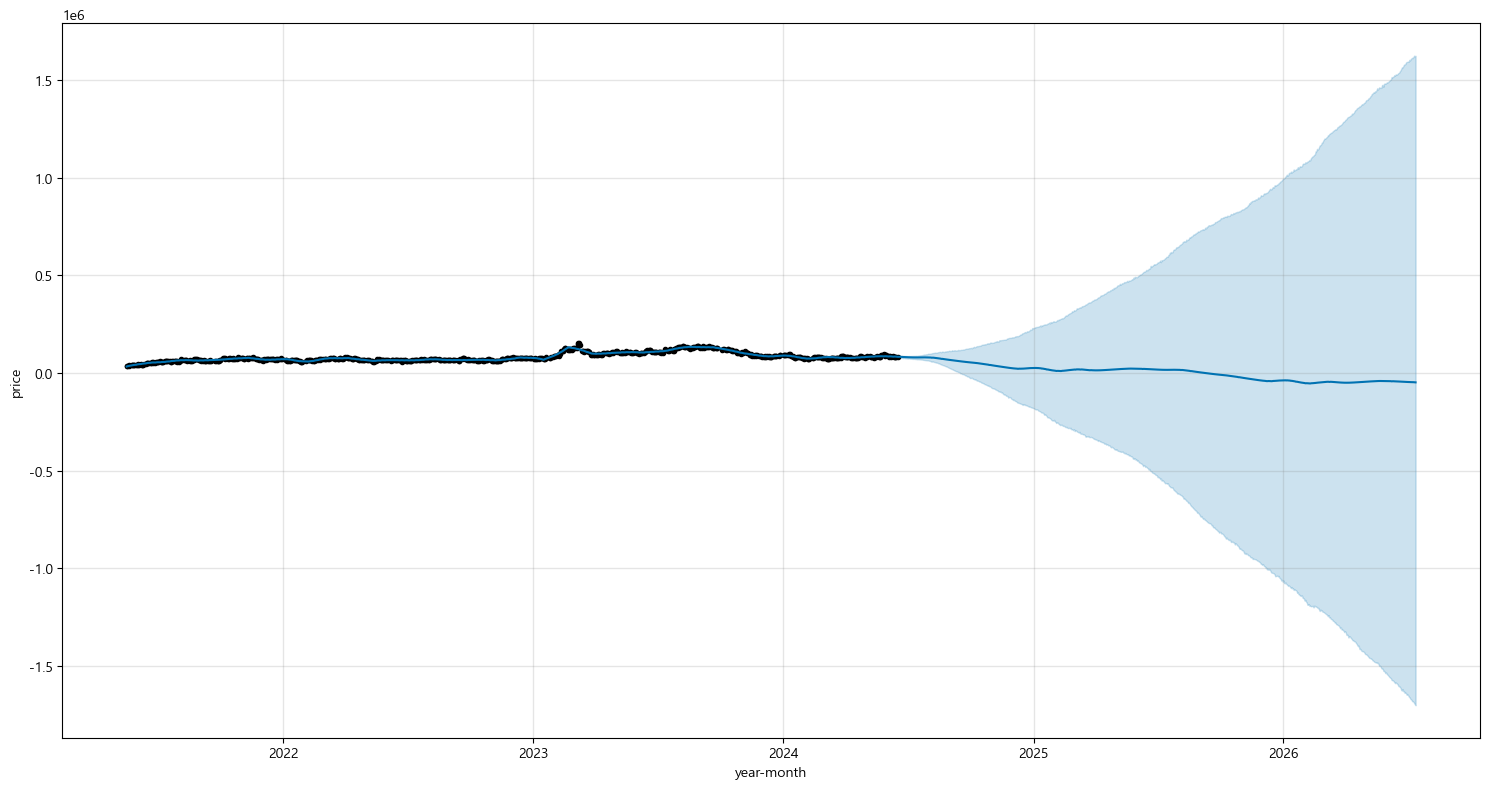

In [70]:
# 예측 결과 데이터 프레임의 정보로 시각화
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')

plt.show()

- 예측 결과 신뢰 구간이 뒤로 갈수록 점점 넓어지는 것을 확인할 수 있었으며,  
  훈련 값이 신뢰 구간과 거의 유사한 것으로 보여졌다.

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

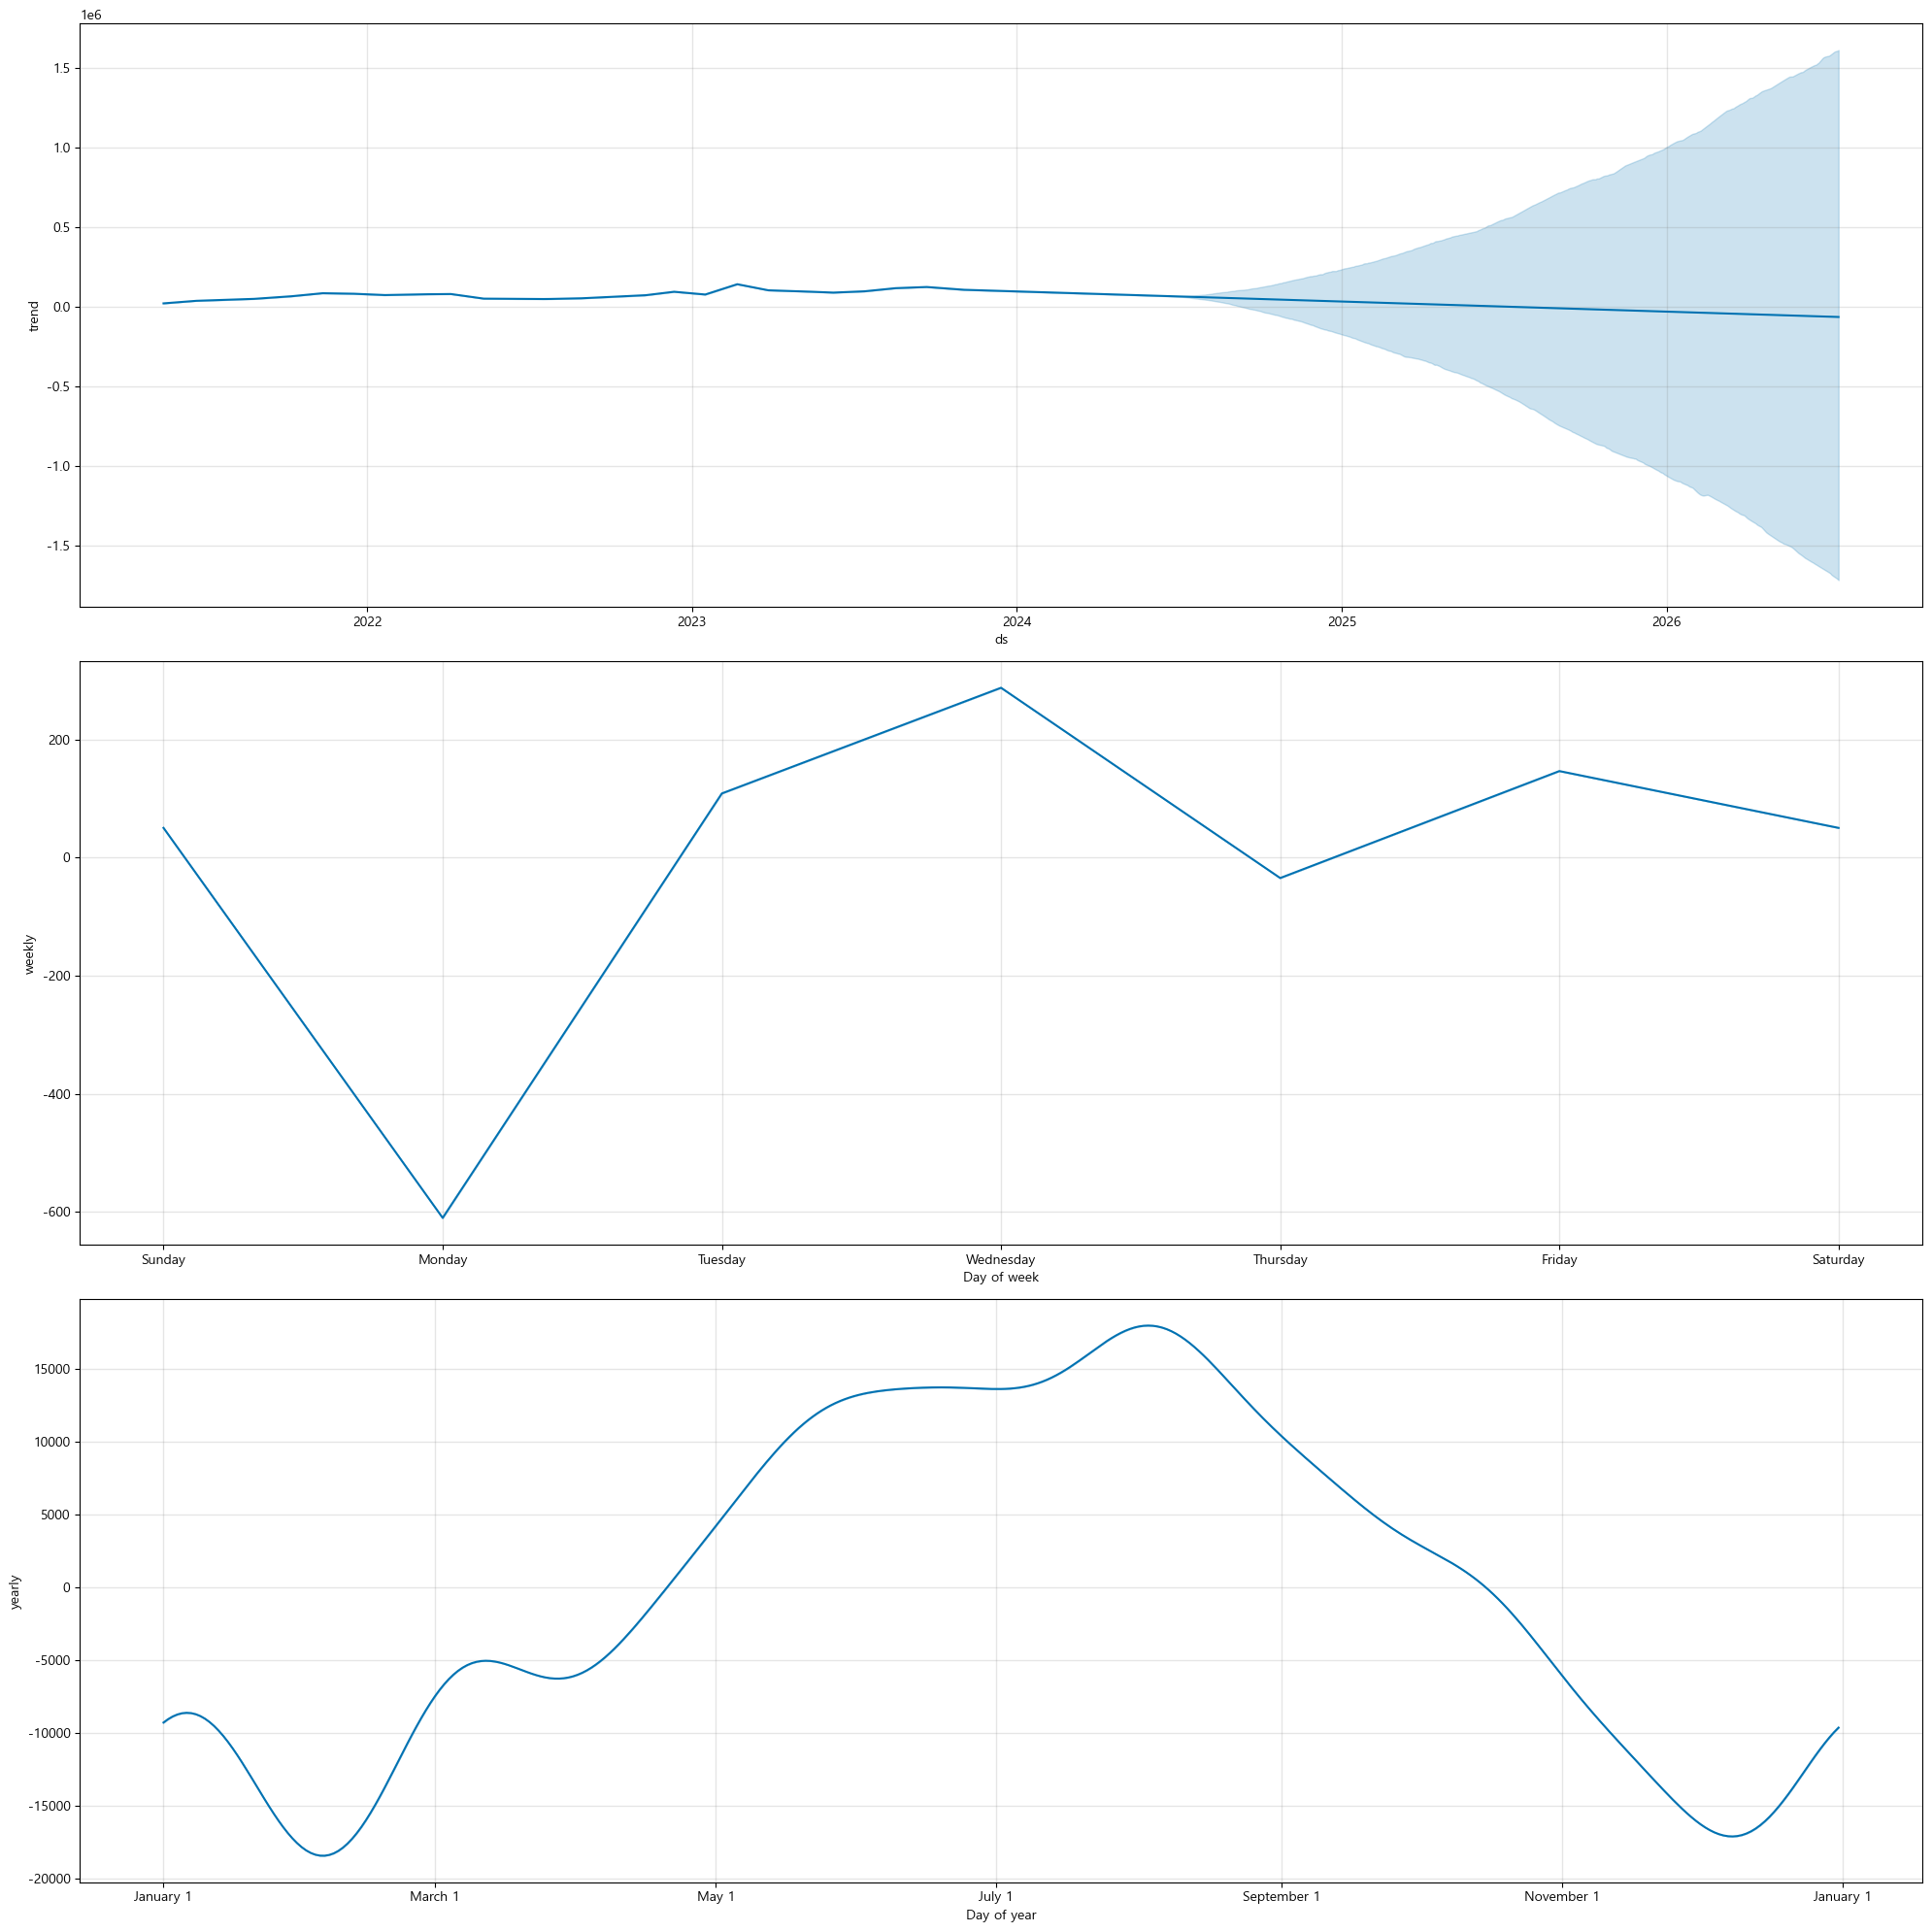

In [71]:
# plot_components(): Prophet 모델의 구성 요소를 시각화
model.plot_components(forecast, figsize=(20, 20))

plt.show()

- 연간 그래프를 보았을 때 거의 일정하게 나오지만 소폭 하락하는 추세가 보여진다.
- 주간 그래프 확인 시 월요일에 많이 하락하며 수요일에 많이 상승하는 것을 알 수 있었다.
- 월간 그래프 확인 시 2월과 11월에 많이 하락하고 5월부터 8월까지 상승하는 추세가 보여진다.